# From Wald Test to Student's t test (T test)

In [1]:
import pandas as pd
import numpy as np
from scipy import stats 
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy.stats import t
import seaborn as sns

# Contents of this note
## 1. Wald Test
## 2. Examples with Bernoulli distribution
### - Wald test with very small sample size
### - Simulation analysis for Wald tests in Bernoulli distribution
- Experiment A. Very small sample size
- Experiment B. Changing null hypothesis with fixed sample size(n=50)
- Experiment C. Changing the sample size

# Part 1 - Introduction to the Wald Test

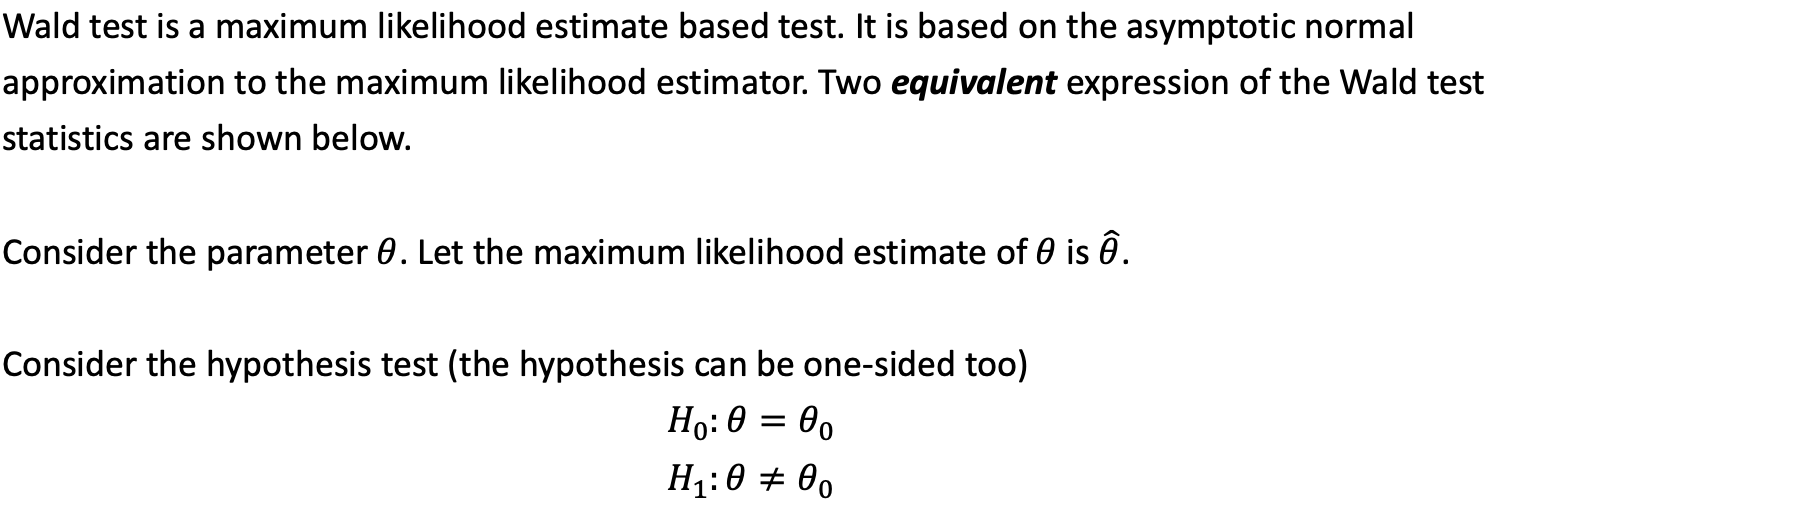

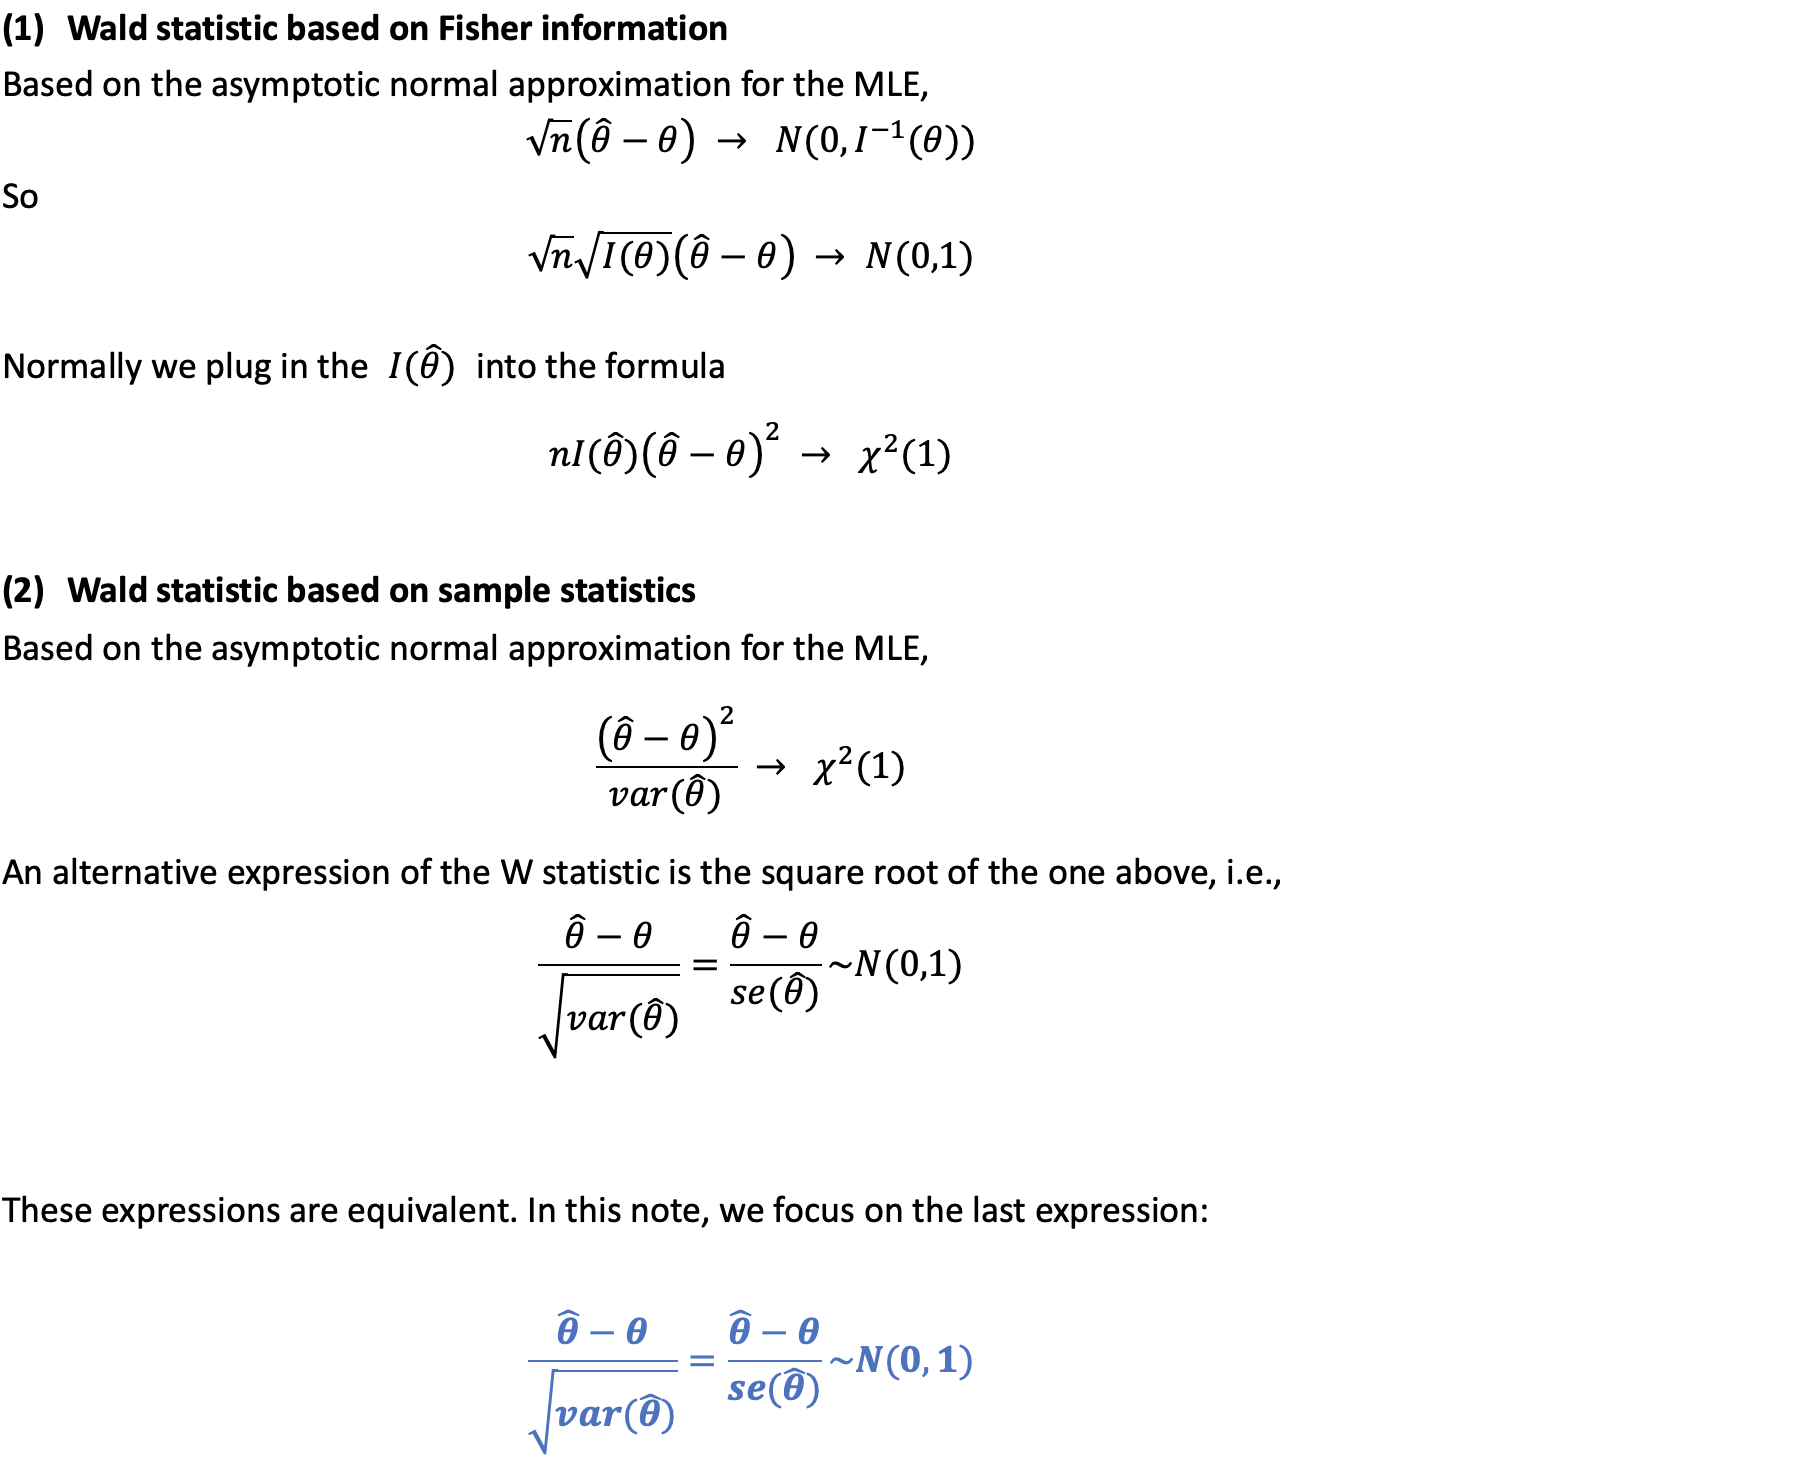

# Part 2 - Examples with Bernoulli distribution

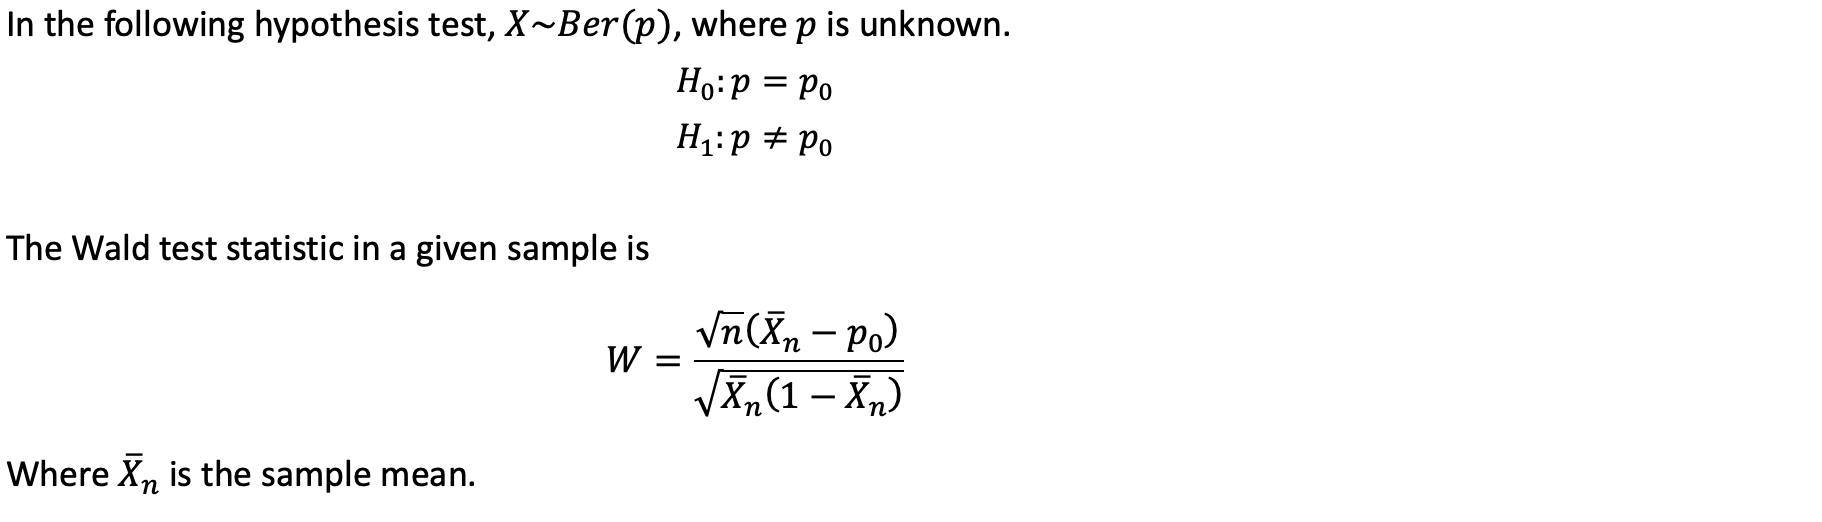
### [See derivation here](https://github.com/houzhj/Statistics/blob/main/math/02_wald_t_derivation_01.pdf)

### However, when the sample size is small (for example 2 or 3), this statistic does not work well.

## 2.1 - Very Small Sample Size

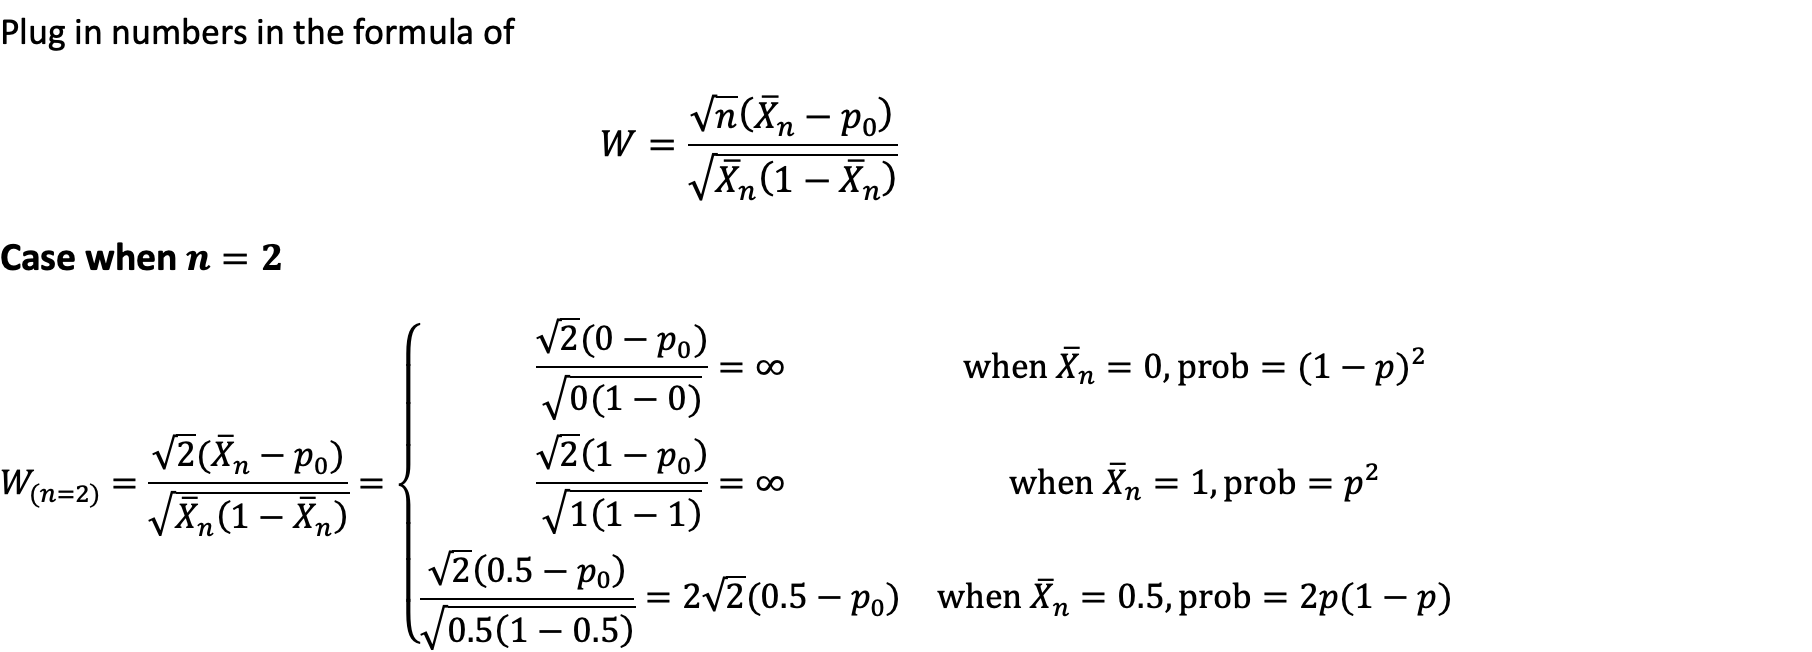

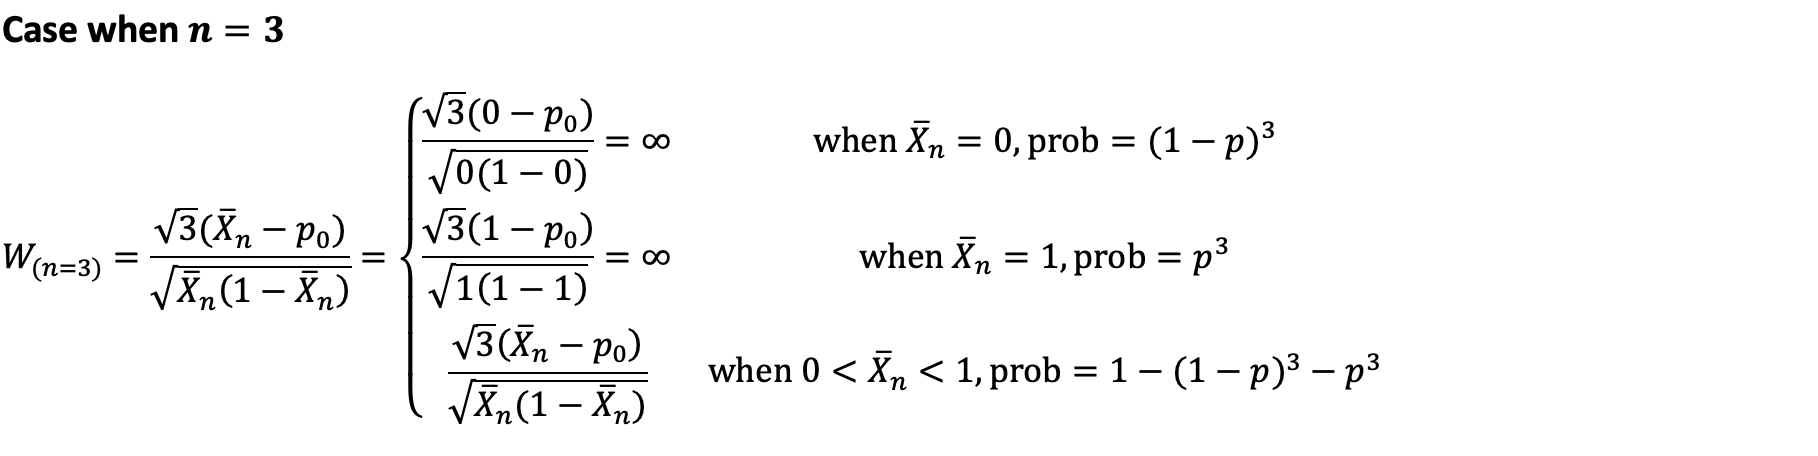

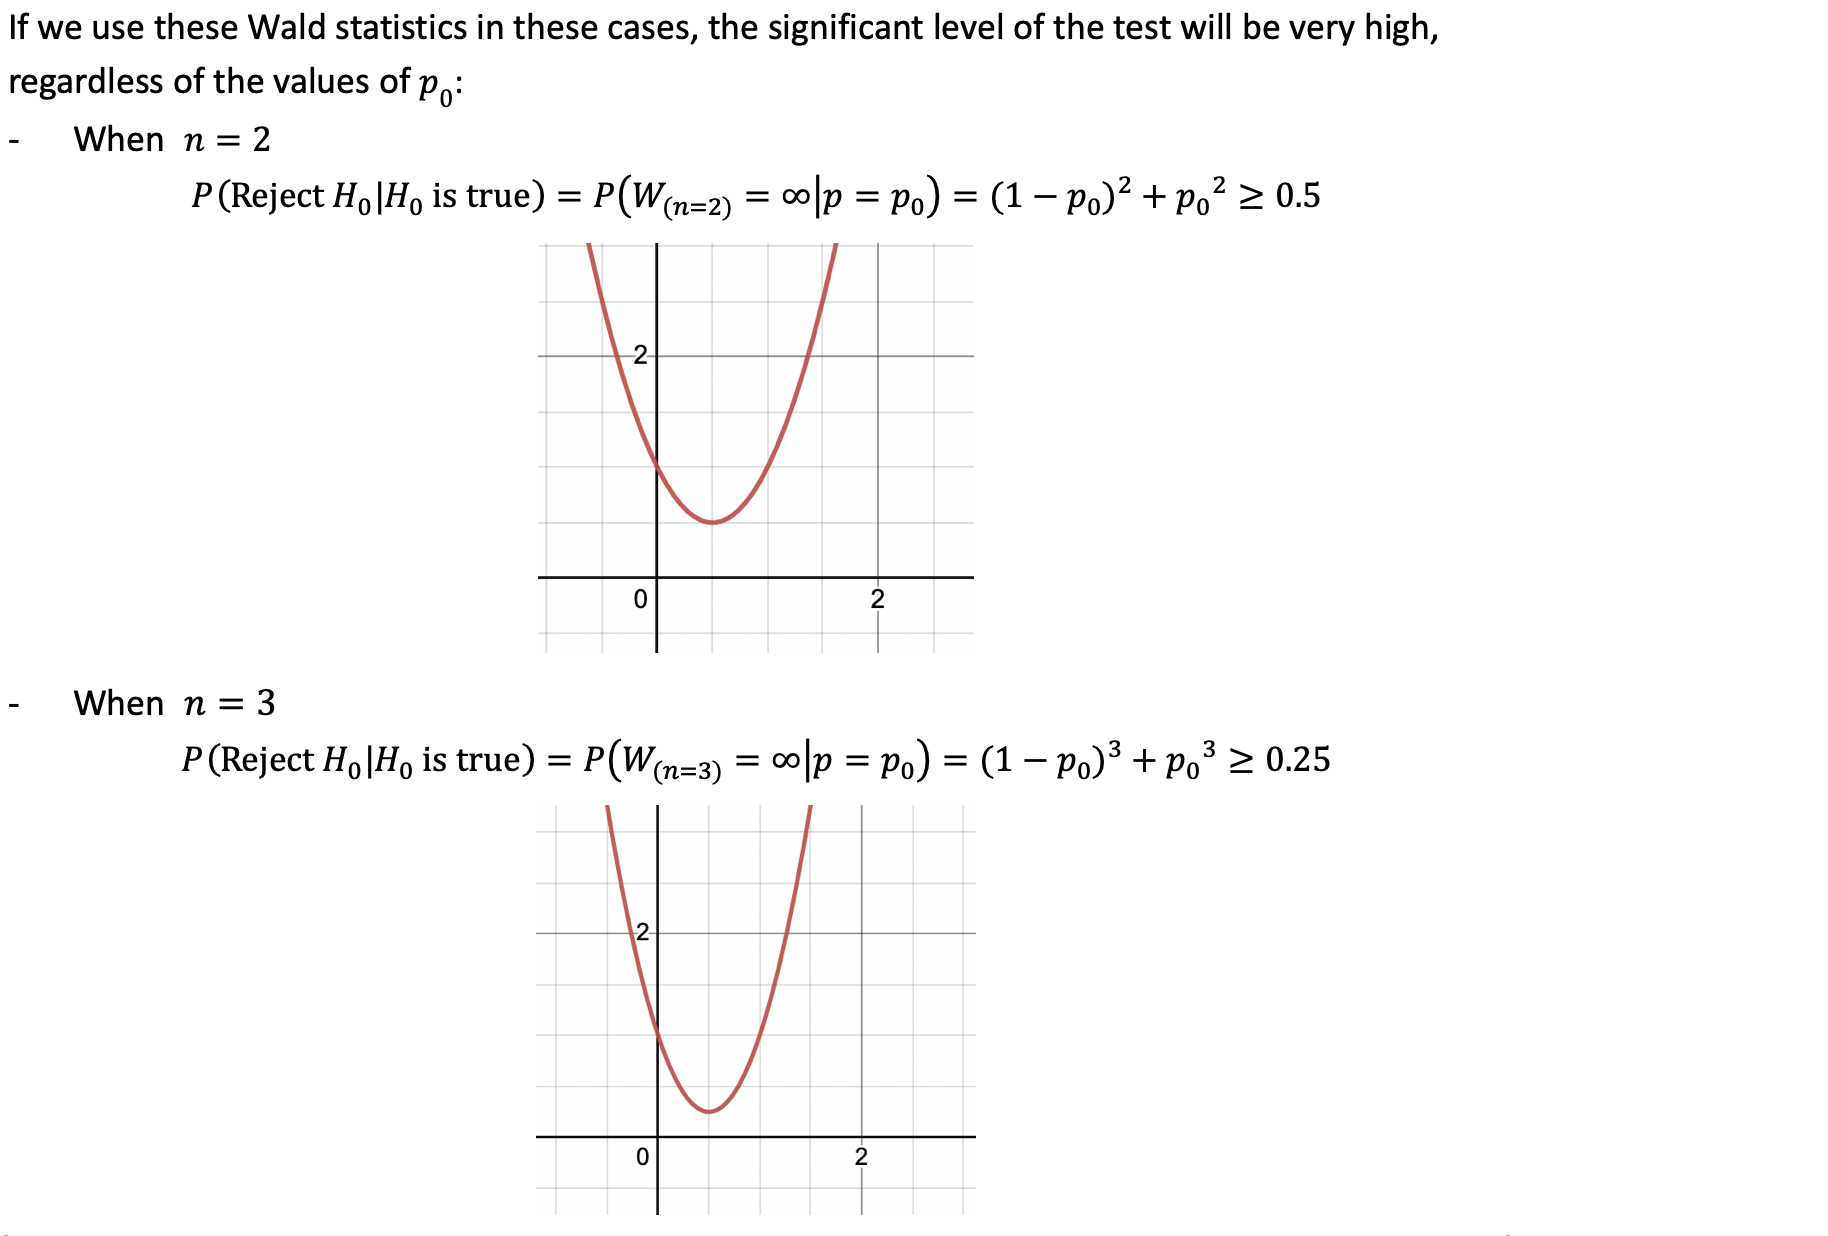

#### These will be also demonstrated in the simulation analysis below

## 2.2 - Simulation Analysis for Wald Tests in Bernoulli distribution

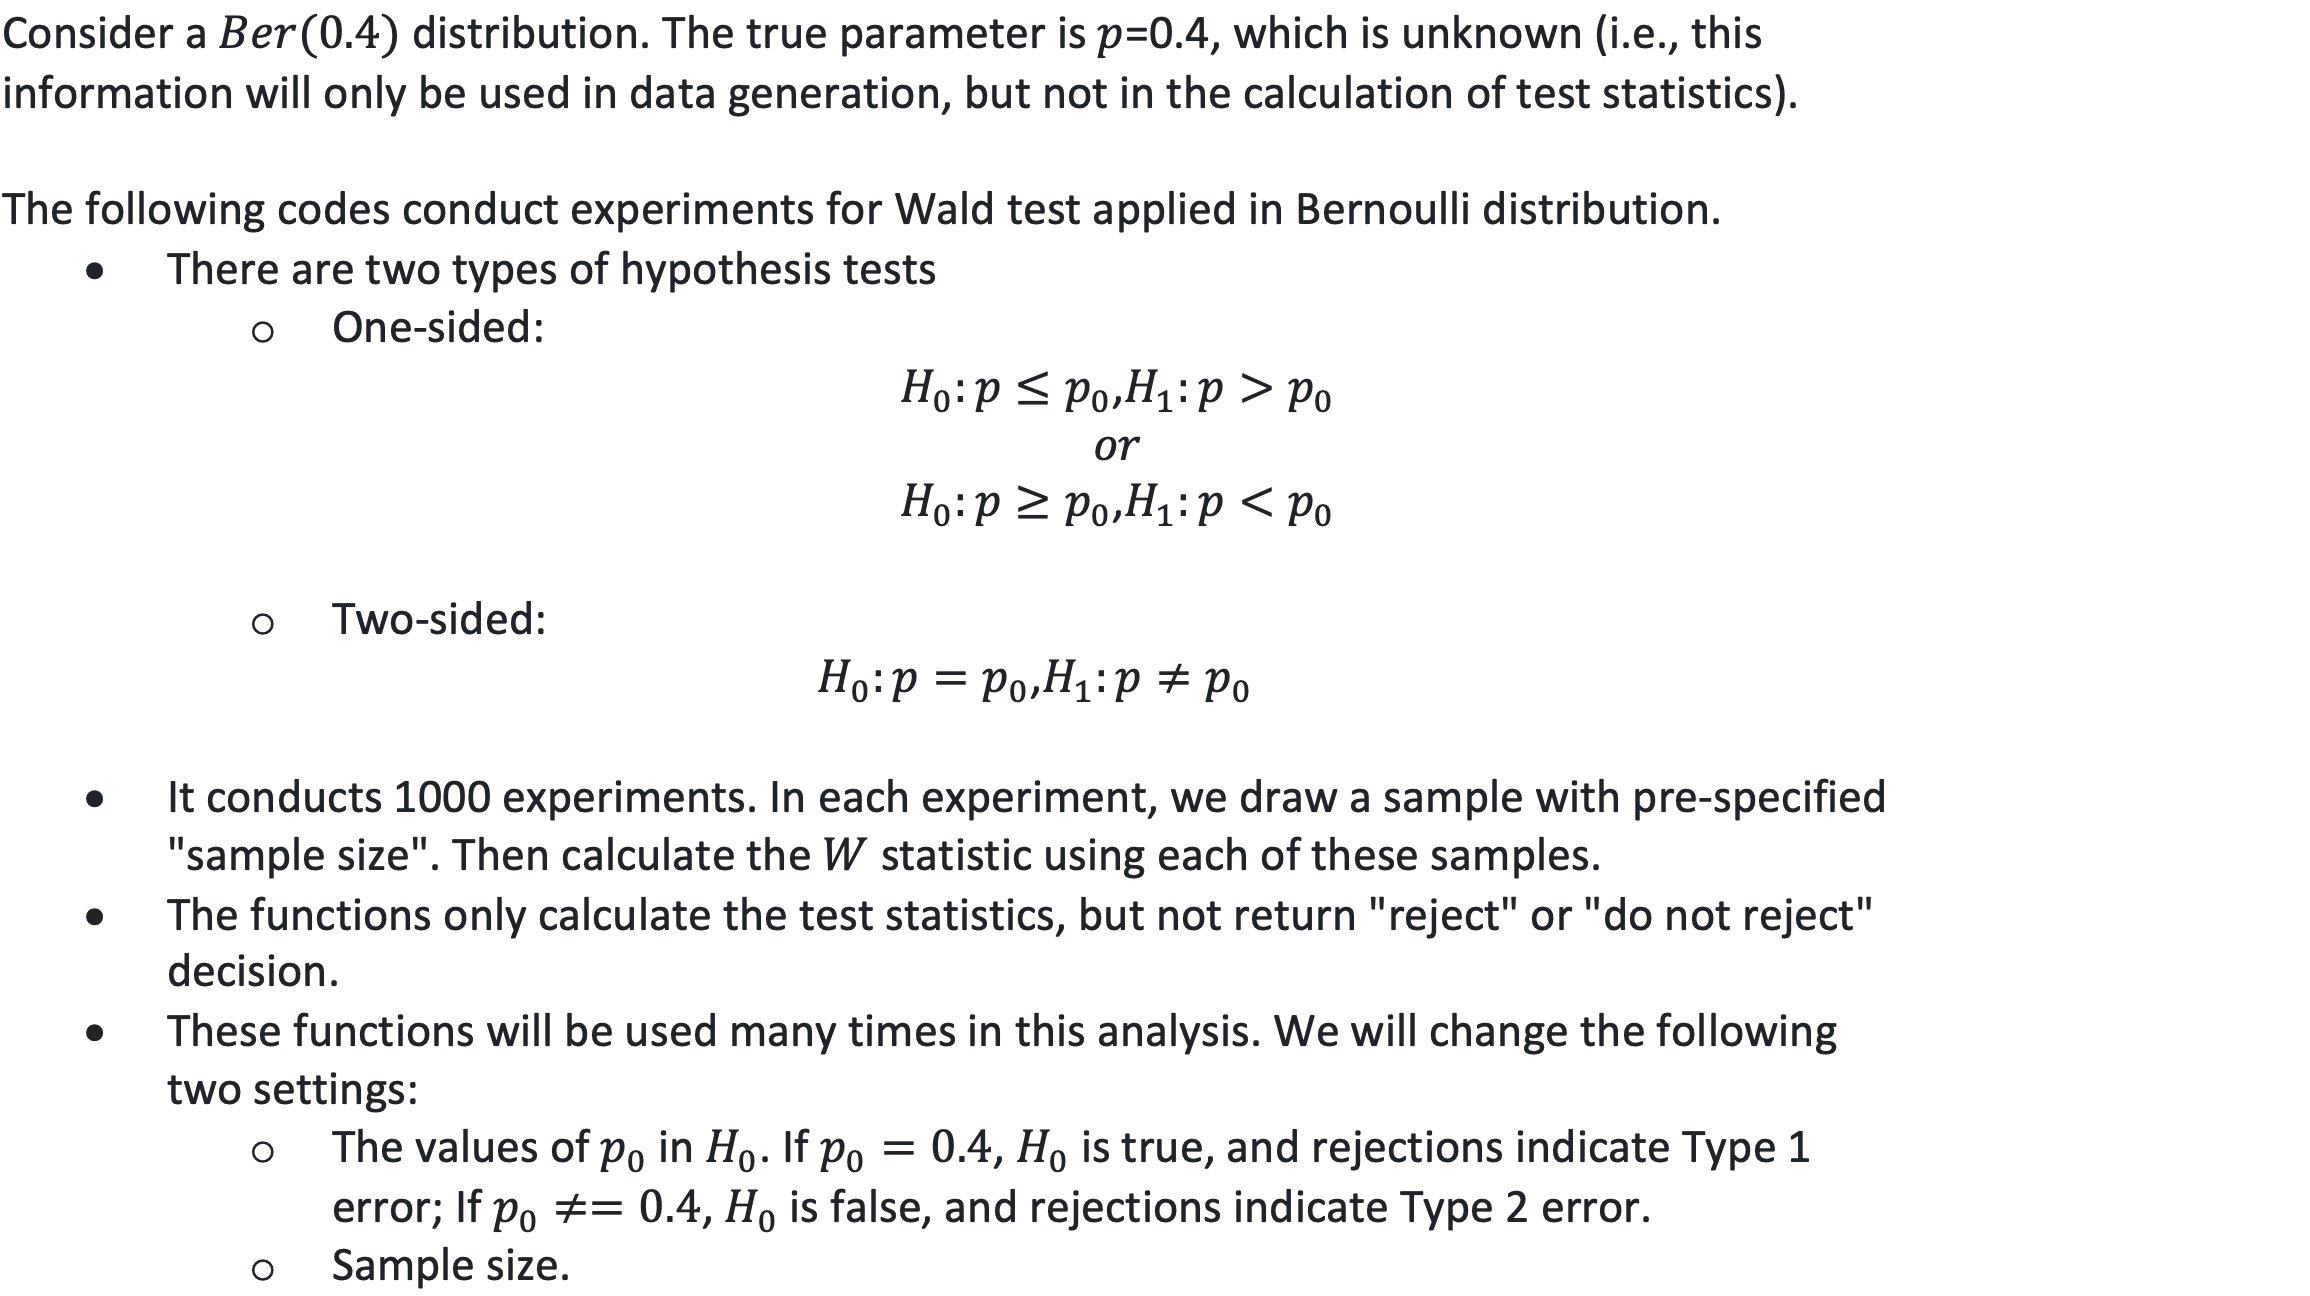

In [2]:
p_true = 0.4
population = np.random.binomial(n=1,p=p_true,size=1000000)

In [3]:
def wald_ber_one_side(sample_size,h0):
    n_experiment = 1000
    dif          = [np.nan]*n_experiment
    var_hat      = [np.nan]*n_experiment
    w            = [np.nan]*n_experiment
    for i in range(n_experiment):
        sample      = np.random.choice(population,size=sample_size,replace=True)
        sample_mean = np.mean(sample)
        dif[i]      = sample_mean-h0
        var_hat[i]  = sample_mean*(1-sample_mean)/sample_size
        if var_hat[i]>0:
            w[i]        = dif[i]/np.sqrt(var_hat[i])
        else:
            w[i] = 99999
    return(w)

def wald_ber_two_side(sample_size,h0):
    n_experiment = 1000
    dif          = [np.nan]*n_experiment
    var_hat      = [np.nan]*n_experiment
    w            = [np.nan]*n_experiment
    for i in range(n_experiment):
        sample      = np.random.choice(population,size=sample_size,replace=True)
        sample_mean = np.mean(sample)
        dif[i]      = sample_mean-h0
        var_hat[i]  = sample_mean*(1-sample_mean)/sample_size
        if var_hat[i]>0:
            w[i]        = abs(dif[i]/np.sqrt(var_hat[i]))
        else:
            w[i] = 99999
    return(w)

An example of how the results look like. 

The output is a list containing 1000 numbers, each number is the statistic in one of 1000 experiments.

In [4]:
wald_ber_two_side(sample_size=20,h0=0.4)

[0.9759000729485335,
 0.0,
 0.0,
 0.9759000729485335,
 0.0,
 0.46880723093849586,
 0.8944271909999157,
 0.9759000729485335,
 0.9759000729485335,
 0.8944271909999157,
 0.8944271909999157,
 1.549193338482967,
 1.549193338482967,
 0.0,
 0.0,
 0.46880723093849586,
 0.46880723093849586,
 1.8257418583505534,
 0.4494665749754946,
 0.4494665749754946,
 1.549193338482967,
 0.46880723093849586,
 1.3483997249264843,
 0.0,
 0.9759000729485335,
 0.0,
 0.9759000729485335,
 1.8257418583505534,
 1.549193338482967,
 1.549193338482967,
 0.8944271909999157,
 0.9759000729485335,
 0.0,
 1.8257418583505534,
 0.46880723093849586,
 0.46880723093849586,
 0.4494665749754946,
 0.4494665749754946,
 1.3483997249264843,
 0.4494665749754946,
 0.46880723093849586,
 0.0,
 0.46880723093849586,
 0.46880723093849586,
 0.4494665749754946,
 1.549193338482967,
 3.131121455425747,
 0.8944271909999157,
 0.9759000729485335,
 0.0,
 0.8944271909999157,
 0.46880723093849586,
 0.46880723093849586,
 0.46880723093849586,
 1.54919333

### Example A - Very small sample size

Three sample sizes are considered in the simulation analysis: 2,5,and 30. Now, the null hypothesis is p<=0.4 in all cases.

#### (1) One-sided tests

The codes below create test statistics from 1000 experiments. The results show that
- When the sample size are very small (like 2 and 5), some of the observed W statistics are infinity (because the observed mean is 1 or 0, and therefore the denominater is zero). In these cases, the W statistics are capped at 99999, so that they can be shown in histograms.
- When the sample size is 30, the W statistics exhibit follows a distribution that is close to N(0,1)

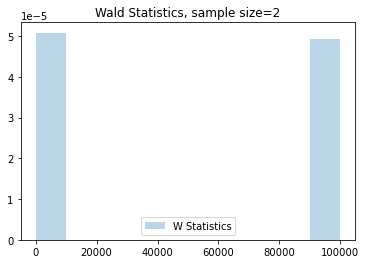

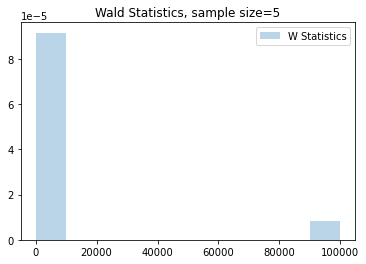

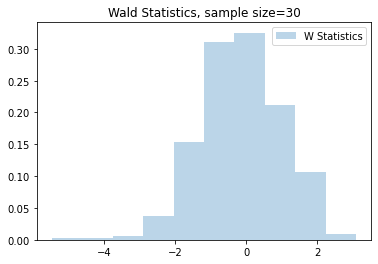

In [5]:
h0 = p_true
for s in [2,5,30]:
    sample_size = s
    w           = wald_ber_one_side(sample_size,h0)
    plt.hist(w,bins=10,alpha=0.3,density=True,label='W Statistics')
    plt.title('Wald Statistics, sample size='+str(sample_size))
    plt.legend()
    plt.show()

#### (2) Two-sided tests
Now, the null hypothesis is p=0.4. 
- Again, when the sample size is 2 or 5, the distribution of the W statistic is not appropriate for testing. 
- When the sample size increases to 30, the W statistics exhibit a distribution that is close to a [half-normal distribution](https://en.wikipedia.org/wiki/Half-normal_distribution).

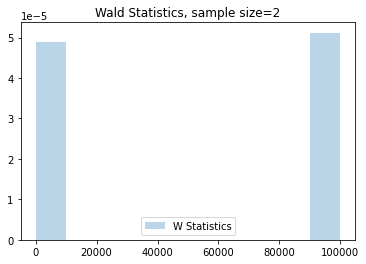

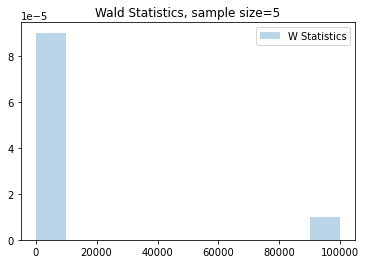

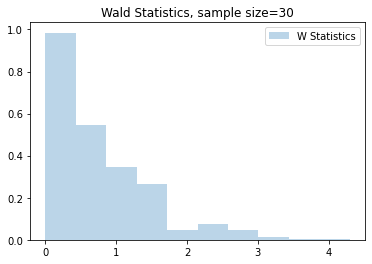

In [6]:
for s in [2,5,30]:
    sample_size = s
    w           = wald_ber_two_side(sample_size,h0)
    plt.hist(w,bins=10,alpha=0.3,density=True,label='W Statistics')
    plt.title('Wald Statistics, sample size='+str(sample_size))
    plt.legend()
    plt.show()

### Example B - Changing null hypothesis with fixed sample size(n=50)

Next assume we have sufficient sample size, say 50. 
The critical value for a given alpha is also presented in each histogram. The critical values depends on the type of a test (one-sided or two-sided), and the level of the test (alpha).

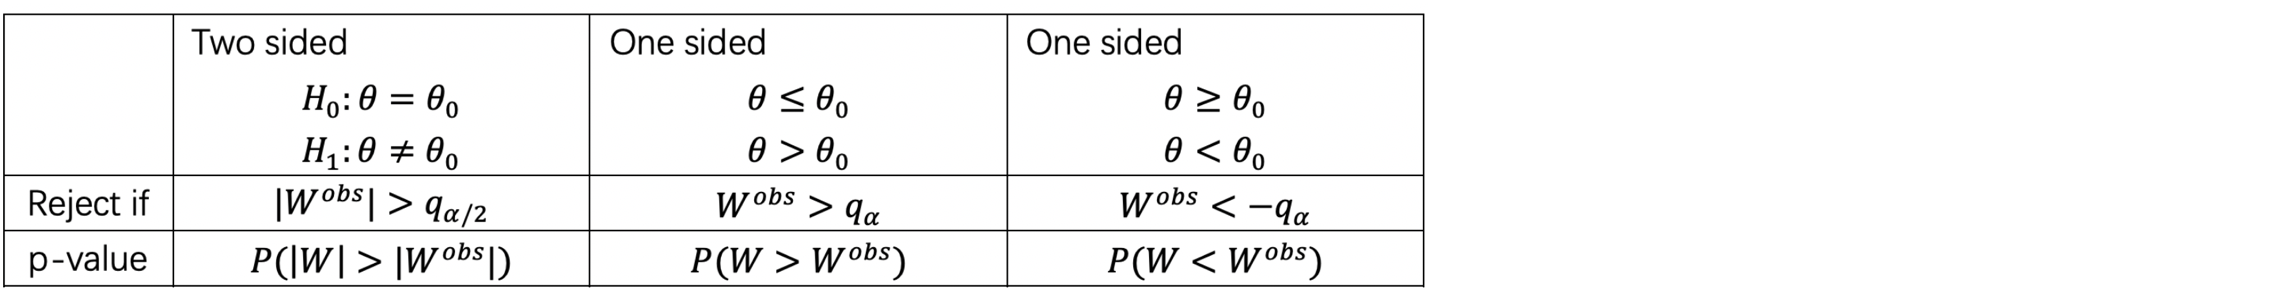
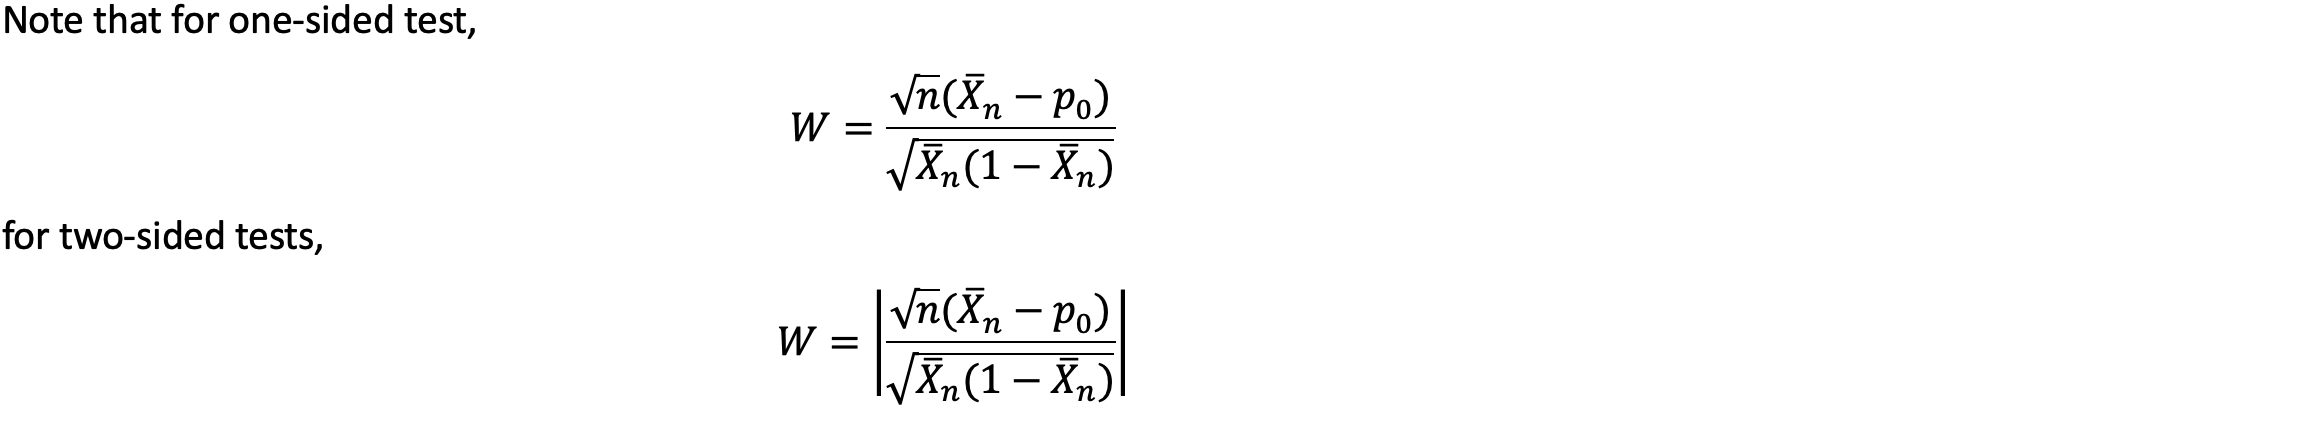

### (1) One-sided Tests
The codes below creates the distrbution of W statistic for **one-sided** hypothesis tests:
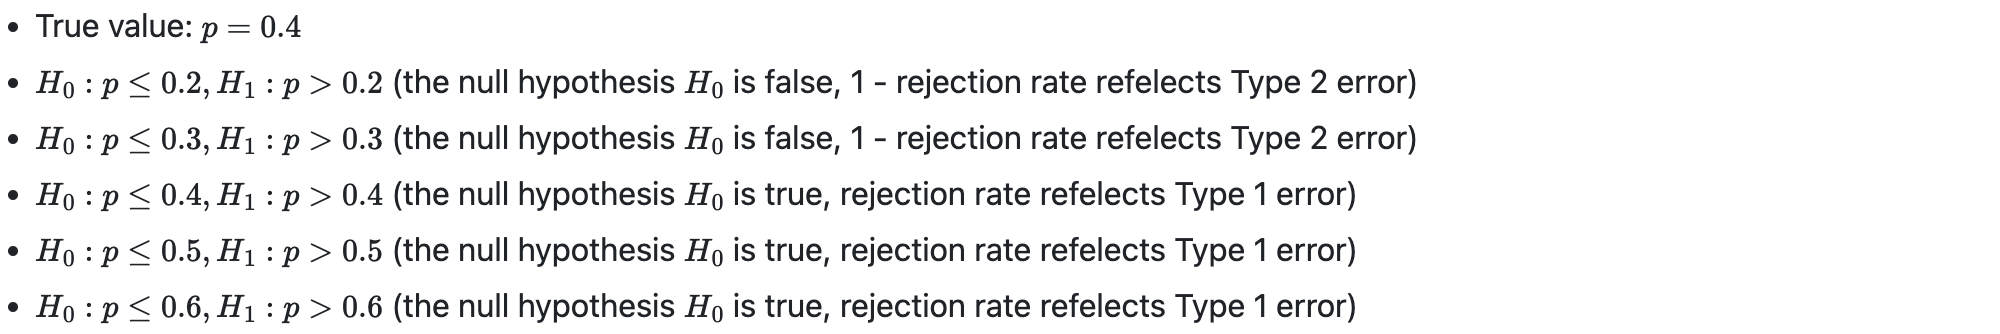

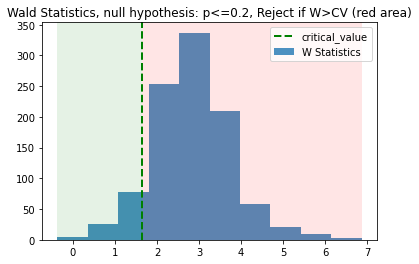

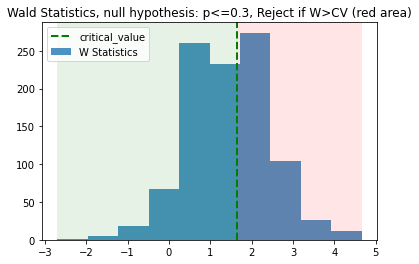

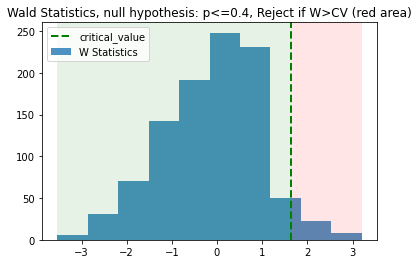

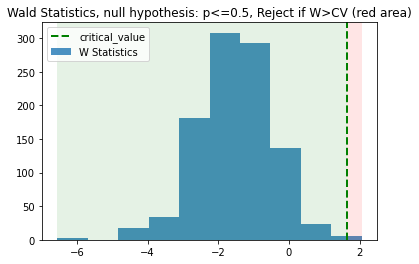

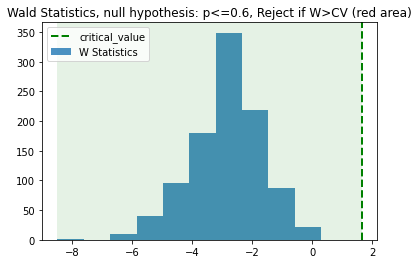

In [7]:
alpha          = 0.05
critical_value = norm.ppf(1-alpha)
h0_list        =  [0.2,0.3,0.4,0.5,0.6]
summary_table  = pd.DataFrame(columns=['h0','Reject_Rate','Error'])

for h in range(len(h0_list)):
    w = wald_ber_one_side(50,h0_list[h])
    reject = [int(w[i]>=critical_value) for i in range(len(w))]
    summary_table.loc[h,'h0'] = 'p<='+str(h0_list[h])
    summary_table.loc[h,'Reject_Rate'] = "{:.3f}".format(np.mean(reject))
    if (h0_list[h]<p_true):
        summary_table.loc[h,'Error'] = 'Type 2: ' + str("{:.3f}".format(1-np.mean(reject)))
    else:
        summary_table.loc[h,'Error'] = 'Type 1: ' + str("{:.3f}".format(np.mean(reject)))
    plt.hist(w,bins=10,alpha=0.8,density=False,label='W Statistics')
    plt.axvline(x=critical_value, color='green', linestyle='dashed', linewidth=2, label='critical_value')
    if critical_value < min(w):
        plt.axvspan(critical_value,max(w),facecolor='red', alpha=0.1)
    if critical_value > max(w):
        plt.axvspan(min(w),critical_value,facecolor='green', alpha=0.1)
    if (critical_value > min(w)) & (critical_value < max(w)):
        plt.axvspan(min(w), critical_value, facecolor='green', alpha=0.1)
        plt.axvspan(critical_value, max(w), facecolor='red', alpha=0.1)
    plt.title('Wald Statistics, null hypothesis: p<='+str(h0_list[h])+', Reject if W>CV (red area)')
    plt.legend()
    plt.show()

#### The tables show the rejection rate (among the 1000 experiments) for each tests.  
- Recall that the pre-specifeid true p is 0.4, so in Test 1 and Test 2, the null hypotheis is not ture.
- Type 2 Error Rate for Test 1 and Test 2 are: P(Fail to Reject H0| H1 is true) = 1-Rejection Rate
- Type 1 Error Rate for Test 3-5 are Rejection Rate are: P(Reject H0| H0 is true) = Rejection Rate
- It can be seen the Test 3, where h0 equals to the true p (critical point), the Type 1 Error is close to the pre-specified level of the test (i.e., alpha=5%)

In [8]:
summary_table

h0 Reject_Rate          Error
0  p<=0.2       0.892  Type 2: 0.108
1  p<=0.3       0.415  Type 2: 0.585
2  p<=0.4       0.047  Type 1: 0.047
3  p<=0.5       0.001  Type 1: 0.001
4  p<=0.6       0.000  Type 1: 0.000

### (2) Two-sided Tests
Similiar codes, and results for **two-sided** hypothesis tests:
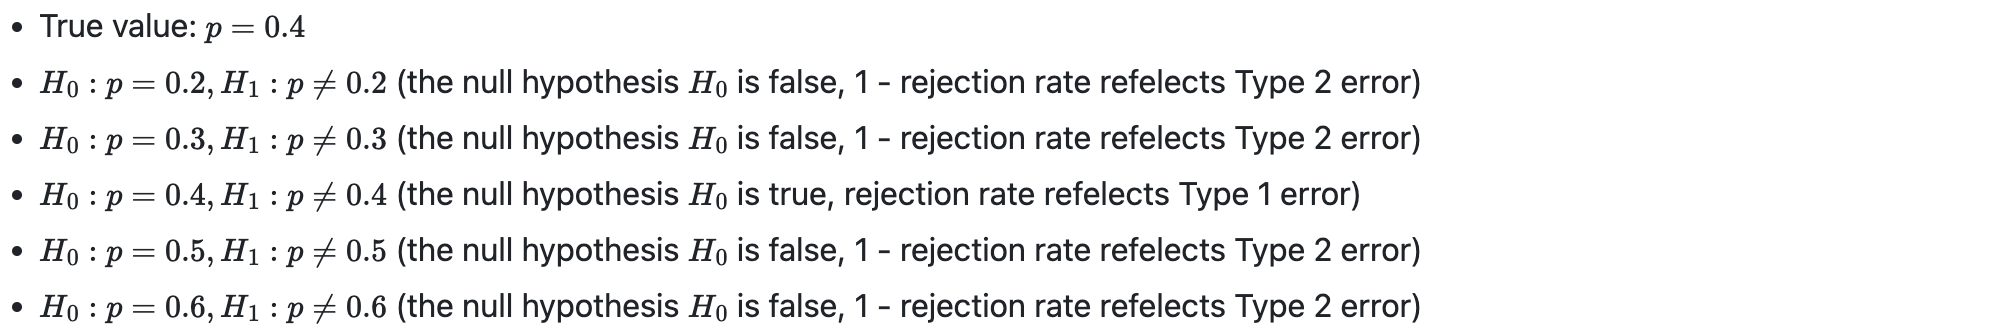

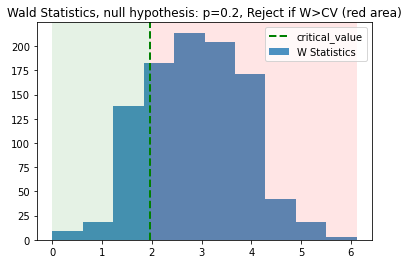

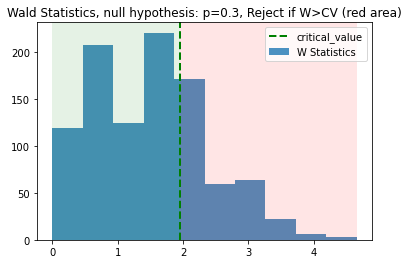

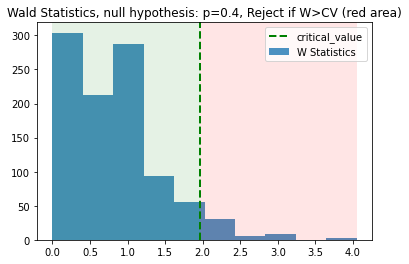

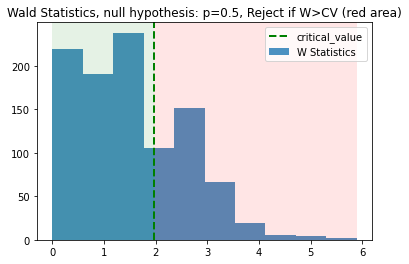

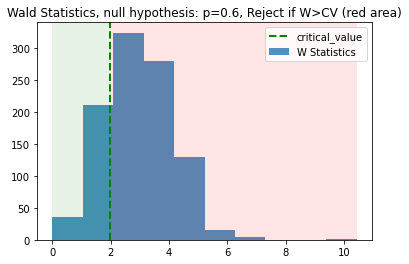

In [9]:
alpha          = 0.05
critical_value = norm.ppf(1-alpha/2)
h0_list        =  [0.2,0.3,0.4,0.5,0.6]
summary_table = pd.DataFrame(columns=['h0','Reject_Rate','Error'])
for h in range(len(h0_list)):
    w = wald_ber_two_side(50,h0_list[h])
    reject = [int(w[i]>=critical_value) for i in range(len(w))]
    summary_table.loc[h,'h0'] = 'p='+str(h0_list[h])
    summary_table.loc[h,'Reject_Rate'] = "{:.3f}".format(np.mean(reject))
    if (h0_list[h]!=p_true):
        summary_table.loc[h,'Error'] = 'Type 2: ' + str("{:.3f}".format(1-np.mean(reject)))
    else:
        summary_table.loc[h,'Error'] = 'Type 1: ' + str("{:.3f}".format(np.mean(reject)))
    plt.hist(w,bins=10,alpha=0.8,density=False,label='W Statistics')
    plt.axvline(x=critical_value, color='green', linestyle='dashed', linewidth=2, label='critical_value')
    if critical_value < min(w):
        plt.axvspan(critical_value,max(w),facecolor='red', alpha=0.1)
    if critical_value > max(w):
        plt.axvspan(min(w),critical_value,facecolor='green', alpha=0.1)
    if (critical_value > min(w)) & (critical_value < max(w)):
        plt.axvspan(min(w), critical_value, facecolor='green', alpha=0.1)
        plt.axvspan(critical_value, max(w), facecolor='red', alpha=0.1)
    plt.title('Wald Statistics, null hypothesis: p='+str(h0_list[h])+', Reject if W>CV (red area)')
    plt.legend()
    plt.show()

The tables show the rejection rate (among the 1000 experiments) for each tests.  
- Recall that the pre-specifeid true p is 0.4, so only the h0 is in Test 3 is true. 
- Type 2 Error Rate for Test 1, Test 2, Test 4, Test 5 are: P(Fail to Reject H0| H1 is true) = 1-Rejection Rate
- Type 1 Error Rate for Test 3 are Rejection Rate are: P(Reject H0| H0 is true) = Rejection Rate
- It can be seen the Test 3, where h0 equals to the true p, the Type 1 Error rate is close to the pre-specified level of the test (i.e., alpha=5%)

In [10]:
summary_table

h0 Reject_Rate          Error
0  p=0.2       0.835  Type 2: 0.165
1  p=0.3       0.327  Type 2: 0.673
2  p=0.4       0.057  Type 1: 0.057
3  p=0.5       0.353  Type 2: 0.647
4  p=0.6       0.847  Type 2: 0.153

### Example C - Changing the sample size

### (1) When the null hypothesis is True
Now consider the impact of sample size. 
- We fixed the level of the test at 5% 
- Consider four choices of sample size: 30, 50,100, 500
- Consider a two-sided hypothesis test with the null hypothesis to be H0: p=0.4. Recall that the true p is 0.4, so this null hypothesis is true. 

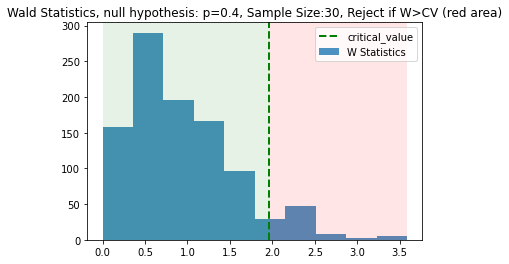

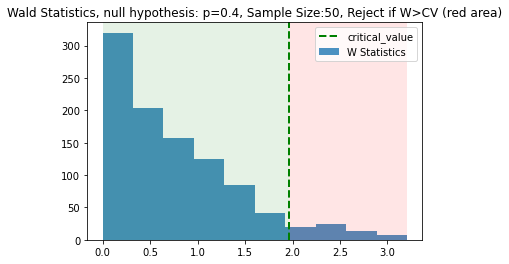

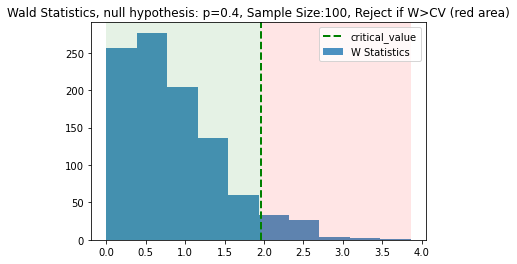

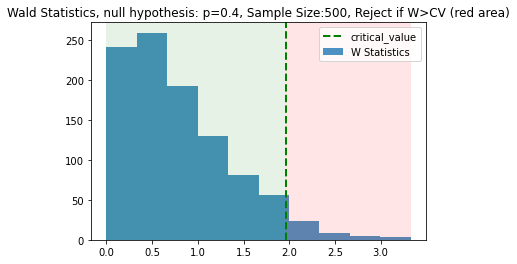

sample_size Reject_Rate          Error
0          30       0.064  Type 1: 0.064
1          50       0.067  Type 1: 0.067
2         100       0.054  Type 1: 0.054
3         500       0.046  Type 1: 0.046

In [11]:
alpha            = 0.05
critical_value   = norm.ppf(1-alpha/2)
sample_size_list = [30, 50,100,500]
summary_table    = pd.DataFrame(columns=['sample_size','Reject_Rate','Error'])
for s in range(len(sample_size_list)):
    w = wald_ber_two_side(sample_size_list[s],0.4)
    reject = [int(w[i]>=critical_value) for i in range(len(w))]
    summary_table.loc[s,'sample_size'] = str(sample_size_list[s])
    summary_table.loc[s,'Reject_Rate'] = "{:.3f}".format(np.mean(reject))
    summary_table.loc[s,'Error'] = 'Type 1: ' + str(round(np.mean(reject),4))
    plt.hist(w,bins=10,alpha=0.8,density=False,label='W Statistics')
    plt.axvline(x=critical_value, color='green', linestyle='dashed', linewidth=2, label='critical_value')
    if critical_value < min(w):
        plt.axvspan(critical_value,max(w),facecolor='red', alpha=0.1)
    if critical_value > max(w):
        plt.axvspan(min(w),critical_value,facecolor='green', alpha=0.1)
    if (critical_value > min(w)) & (critical_value < max(w)):
        plt.axvspan(min(w), critical_value, facecolor='green', alpha=0.1)
        plt.axvspan(critical_value, max(w), facecolor='red', alpha=0.1)
    plt.title('Wald Statistics, null hypothesis: p=0.4,'+' Sample Size:'+str(sample_size_list[s])+', Reject if W>CV (red area)')
    plt.legend()
    plt.show()
summary_table

#### From the resutls, we can see Type 1 Error Rate (rejection rate among the 1000 experiments) are all close to the pre-specified level (alpha=5%). I.e., increasing sample size (from 30 to 500) does not improve the level of a test.

### (2) When the null hypothesis is False
Next let's consider another two-sided hypothesis test with the null hypothesis to be H0: p=0.5. Recall that the true p is 0.4, so this null hypothesis is not true. 

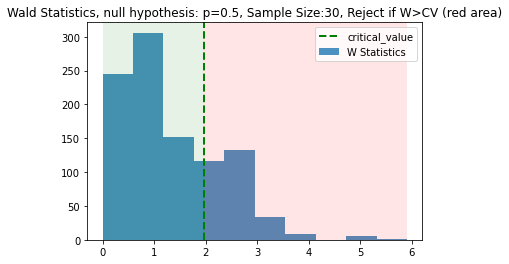

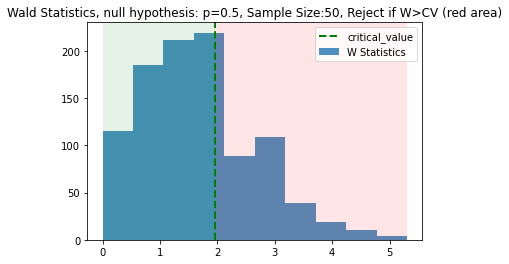

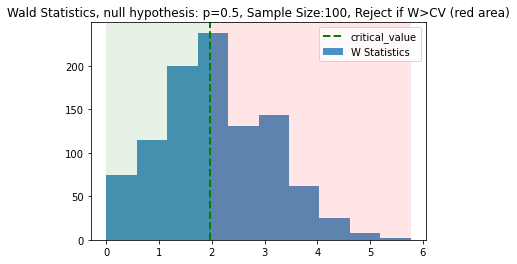

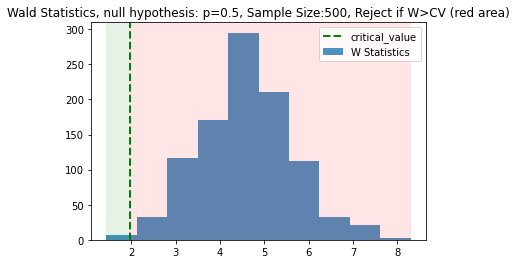

sample_size Reject_Rate          Error
0          30       0.180  Type 2: 0.820
1          50       0.369  Type 2: 0.631
2         100       0.534  Type 2: 0.466
3         500       0.996  Type 2: 0.004

In [12]:
alpha            = 0.05
critical_value   = norm.ppf(1-alpha/2)
sample_size_list = [30, 50,100,500]
summary_table = pd.DataFrame(columns=['sample_size','Reject_Rate','Error'])
for s in range(len(sample_size_list)):
    w = wald_ber_two_side(sample_size_list[s],0.5)
    reject = [int(w[i]>=critical_value) for i in range(len(w))]
    summary_table.loc[s,'sample_size'] = str(sample_size_list[s])
    summary_table.loc[s,'Reject_Rate'] = "{:.3f}".format(np.mean(reject))
    summary_table.loc[s,'Error'] = 'Type 2: ' + str("{:.3f}".format(1-np.mean(reject)))
    plt.hist(w,bins=10,alpha=0.8,density=False,label='W Statistics')
    plt.axvline(x=critical_value, color='green', linestyle='dashed', linewidth=2, label='critical_value')
    if critical_value < min(w):
        plt.axvspan(critical_value,max(w),facecolor='red', alpha=0.1)
    if critical_value > max(w):
        plt.axvspan(min(w),critical_value,facecolor='green', alpha=0.1)
    if (critical_value > min(w)) & (critical_value < max(w)):
        plt.axvspan(min(w), critical_value, facecolor='green', alpha=0.1)
        plt.axvspan(critical_value, max(w), facecolor='red', alpha=0.1)
    plt.title('Wald Statistics, null hypothesis: p=0.5,'+' Sample Size:'+str(sample_size_list[s])+', Reject if W>CV (red area)')
    plt.legend()
    plt.show()
summary_table

#### From the resutls, we can see in Type 2 Error Rate (Rejection Rate among the 1000 experiments) are quite different. The test with 500 sample size has a low Type 2 Error Rate (equivalently the power of this test, 1-Type 2 Error Rate, is high). I.e., increasing sample size (from 30 to 500) improves the power of a test.

### (3) Consider a null hypothesis using a value more closer to 0.4
- If we consider a null hypothesis using a value more closer to 0.4, a larger sample size will be needed to get a test with high power. 
- Consider the test - H0: p=0.41. In the table, the Type 2 Error rate is higher than 10% until the sample size increases to 30000.

In [13]:
alpha            = 0.05
critical_value   = norm.ppf(1-alpha/2)
sample_size_list = [30,50,100,500,5000,10000,20000,30000]
summary_table    = pd.DataFrame(columns=['sample_size','Reject_Rate','Error'])
for s in range(len(sample_size_list)):
    w = wald_ber_two_side(sample_size_list[s],0.41)
    reject = [int(w[i]>=critical_value) for i in range(len(w))]
    summary_table.loc[s,'sample_size'] = str(sample_size_list[s])
    summary_table.loc[s,'Reject_Rate'] = "{:.3f}".format(np.mean(reject))
    summary_table.loc[s,'Error'] = 'Type 2: ' + str("{:.3f}".format(1-np.mean(reject)))
summary_table

sample_size Reject_Rate          Error
0          30       0.062  Type 2: 0.938
1          50       0.077  Type 2: 0.923
2         100       0.059  Type 2: 0.941
3         500       0.072  Type 2: 0.928
4        5000       0.323  Type 2: 0.677
5       10000       0.526  Type 2: 0.474
6       20000       0.824  Type 2: 0.176
7       30000       0.951  Type 2: 0.049

# Part 3 - Examples with Gaussian distribution

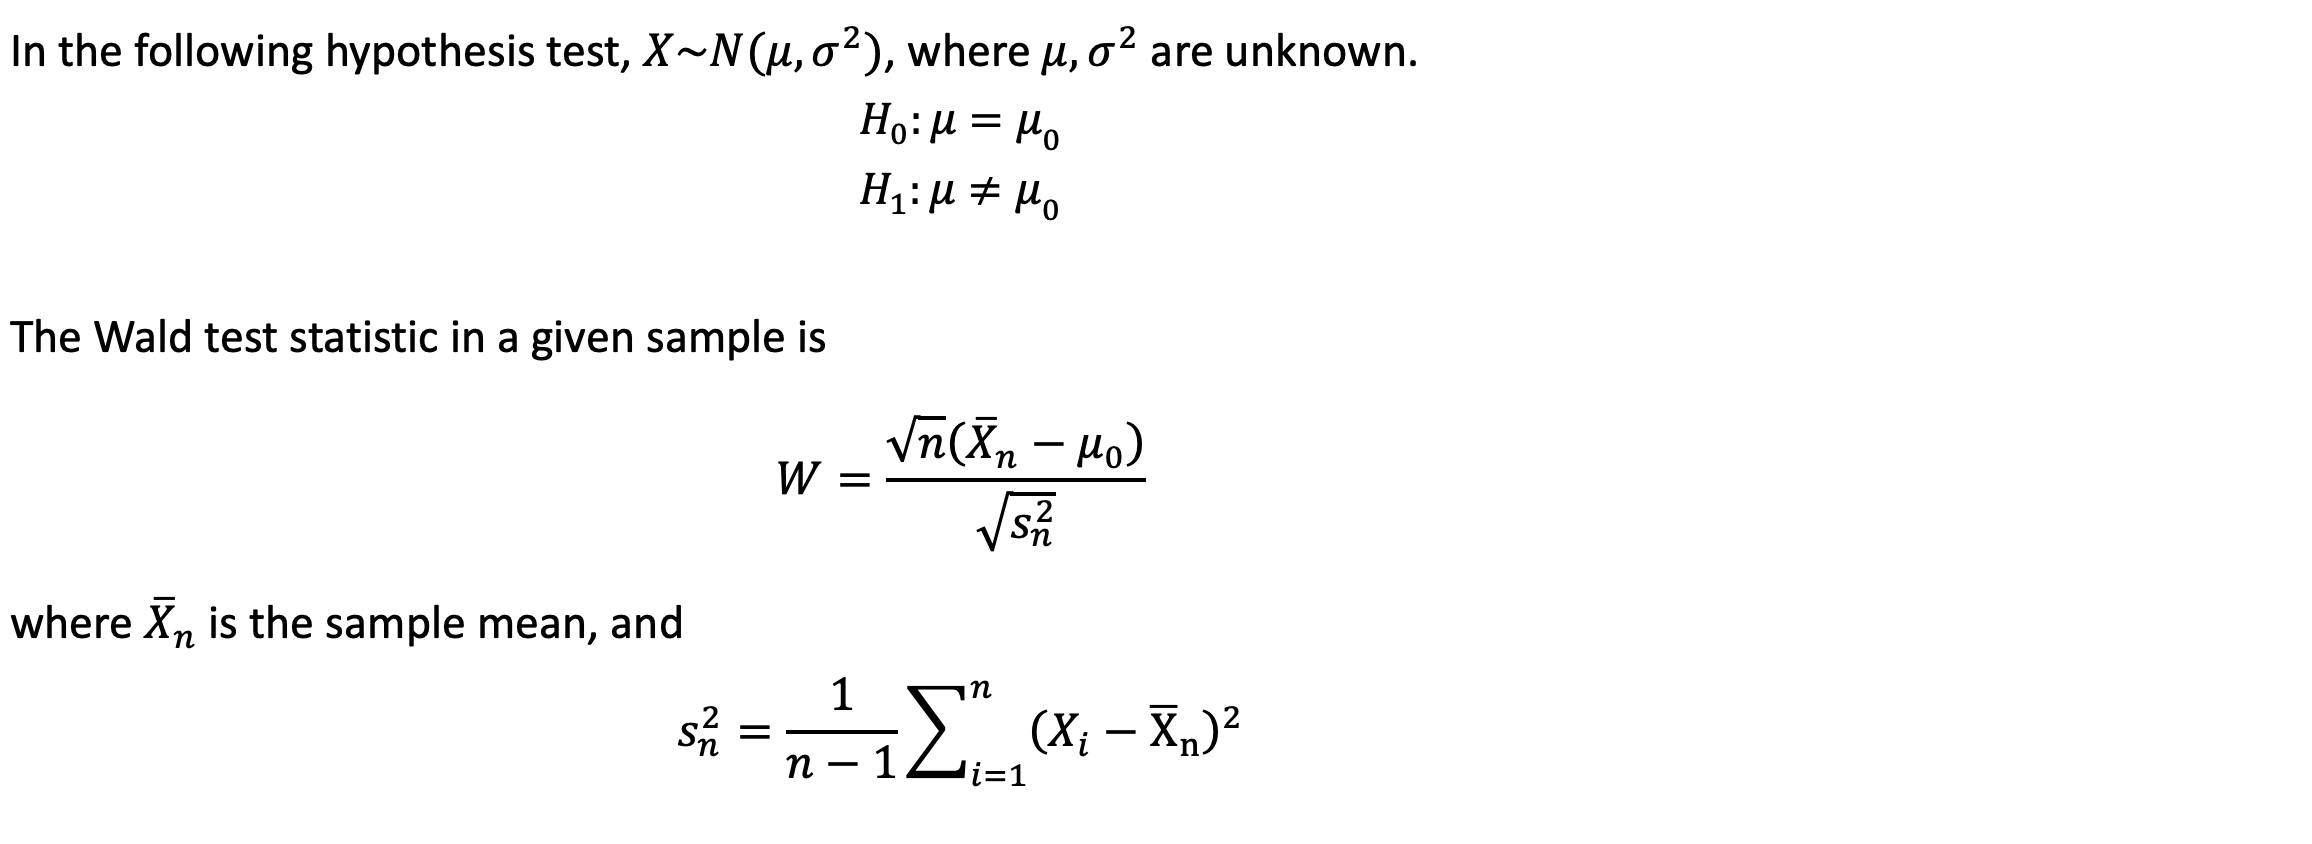

### [See derivations here](https://github.com/houzhj/Statistics/blob/main/math/02_wald_t_derivation_02.pdf)

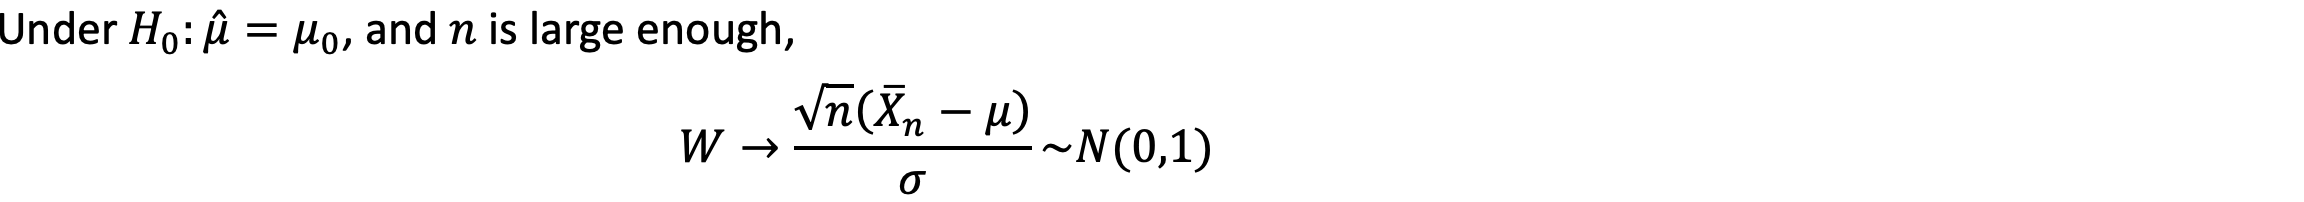

## 3.1 - Very Small Sample Size

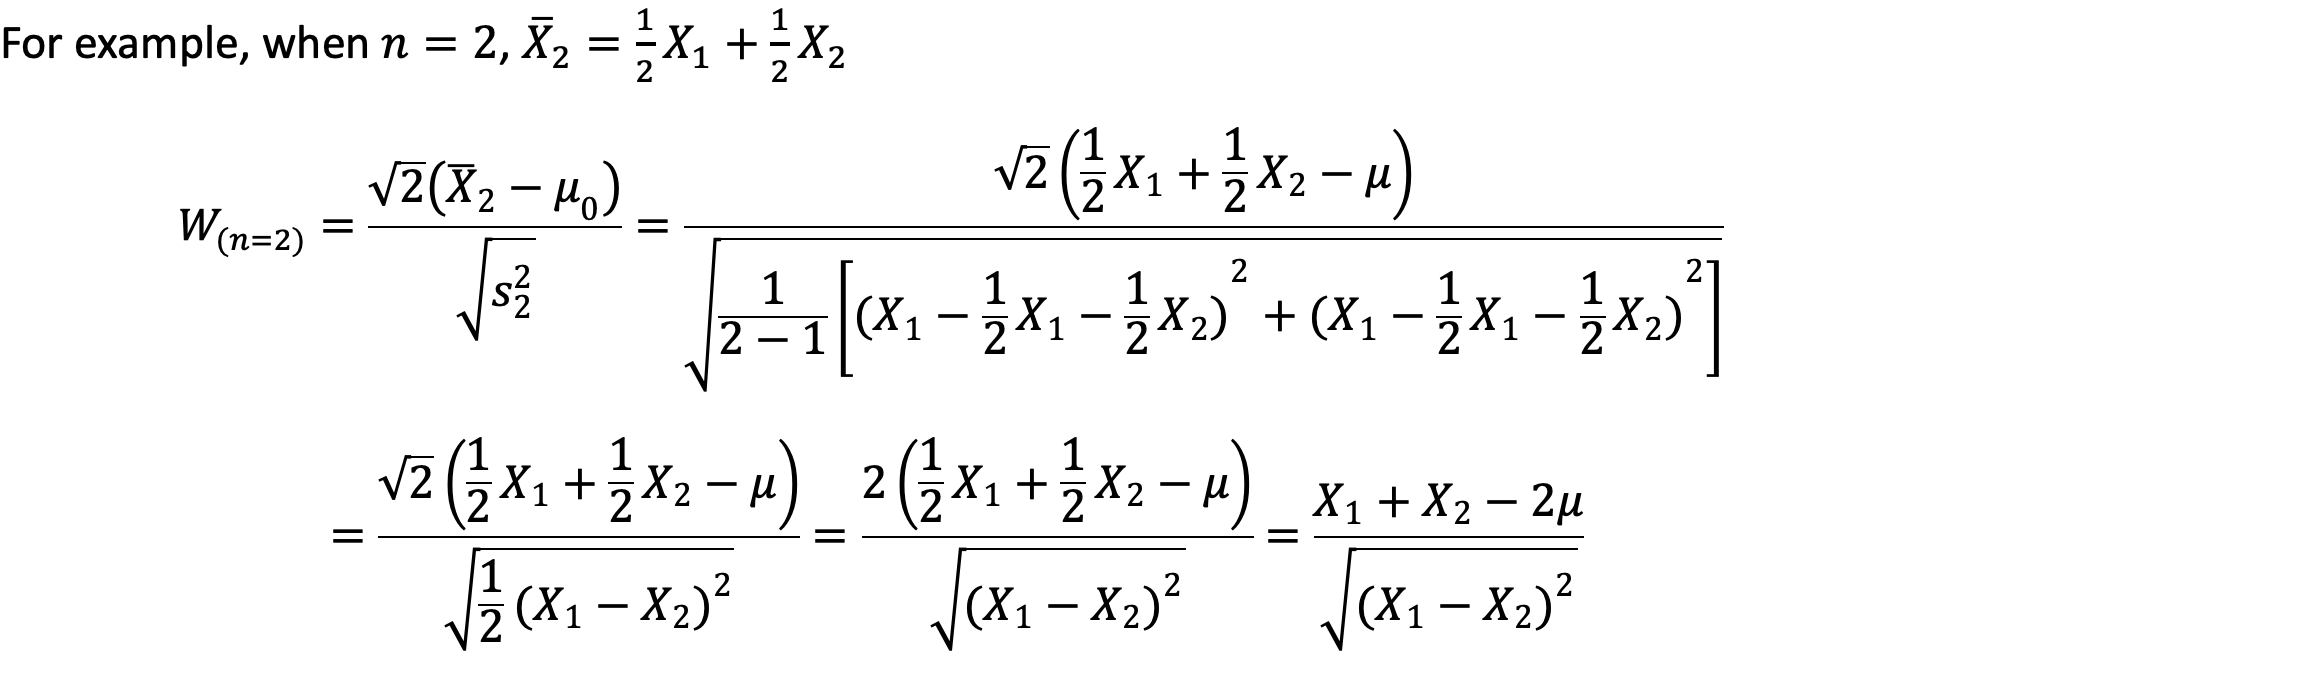

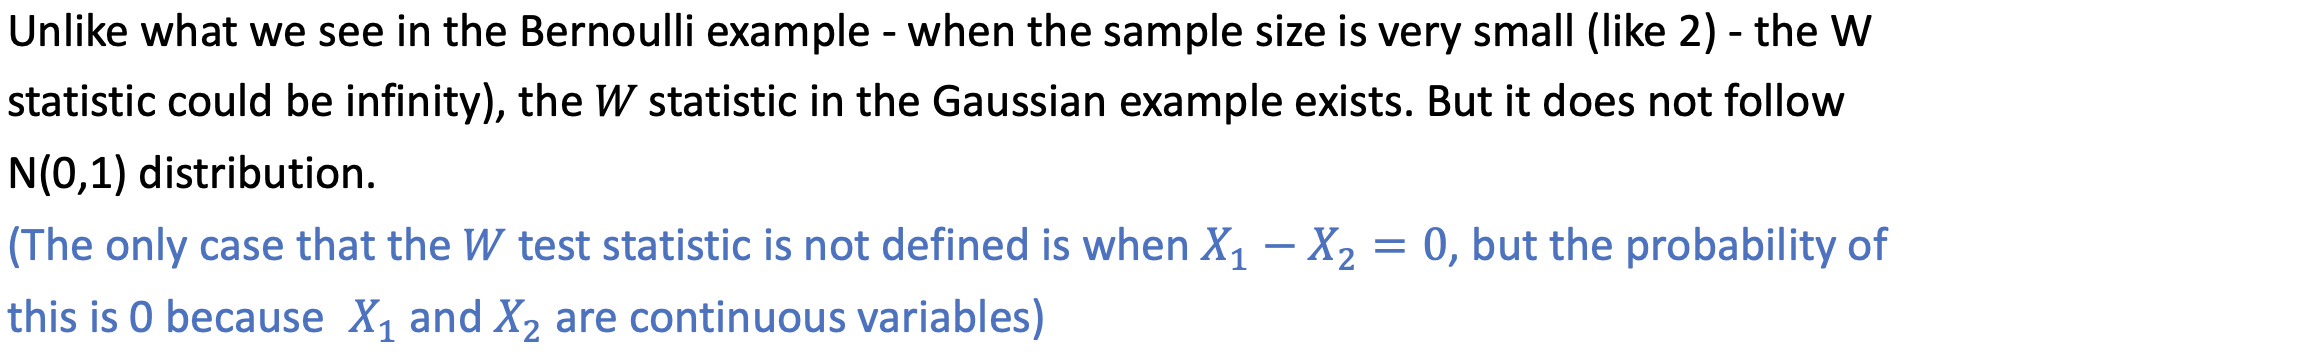

Consider a Normal (3,4) distribution.
Note that the true variance will not be used in the hypothesis tests. 

In [14]:
mu_true     = 3
sigma2_true = 4
population  = np.random.normal(mu_true,np.sqrt(sigma2_true),100000)

In [15]:
n_experiment = 2000
w2 = [np.nan]*n_experiment
w3 = [np.nan]*n_experiment
w4 = [np.nan]*n_experiment
for i in range(n_experiment):
    x1 = float(np.random.choice(population,1,replace=False))
    x2 = float(np.random.choice(population,1,replace=False))
    x3 = float(np.random.choice(population,1,replace=False))
    x4 = float(np.random.choice(population,1,replace=False))
    x_mean_2 = 0.5*(x1+x2)
    w2[i] = np.sqrt(2)*(x_mean_2-mu_true)/np.sqrt((1/(2-1))*sum([(i-x_mean_2)**2 for i in [x1,x2]]))
    x_mean_3 = (x1+x2+x3)/3
    w3[i] = np.sqrt(3)*(x_mean_3-mu_true)/np.sqrt((1/(3-1))*sum([(i-x_mean_3)**2 for i in [x1,x2,x3]]))
    x_mean_4 = (x1+x2+x3+x4)/4
    w4[i] = np.sqrt(4)*(x_mean_4-mu_true)/np.sqrt((1/(4-1))*sum([(i-x_mean_4)**2 for i in [x1,x2,x3,x4]]))

The histograms below show the distribution of W statistics, with three different sample sizes 2,3, and 4. The sample variances of these W statistics are clearly not for N(0,1).

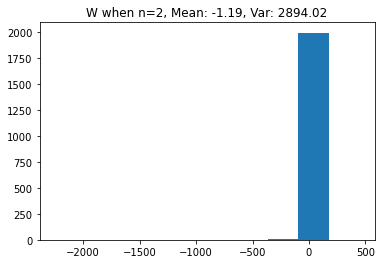

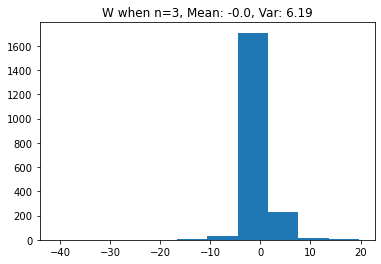

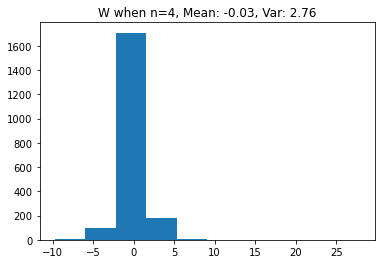

In [16]:
plt.hist(w2,bins=10)
plt.title('W when n=2, '+'Mean: '+ str(round(np.mean(w2),2))+', Var: '+ str(round(np.var(w2),2)))
plt.show()
plt.hist(w3,bins=10)
plt.title('W when n=3, '+'Mean: '+ str(round(np.mean(w3),2))+', Var: '+ str(round(np.var(w3),2)))
plt.show()
plt.hist(w4,bins=10)
plt.title('W when n=4, '+'Mean: '+ str(round(np.mean(w4),2))+', Var: '+ str(round(np.var(w4),2)))
plt.show()

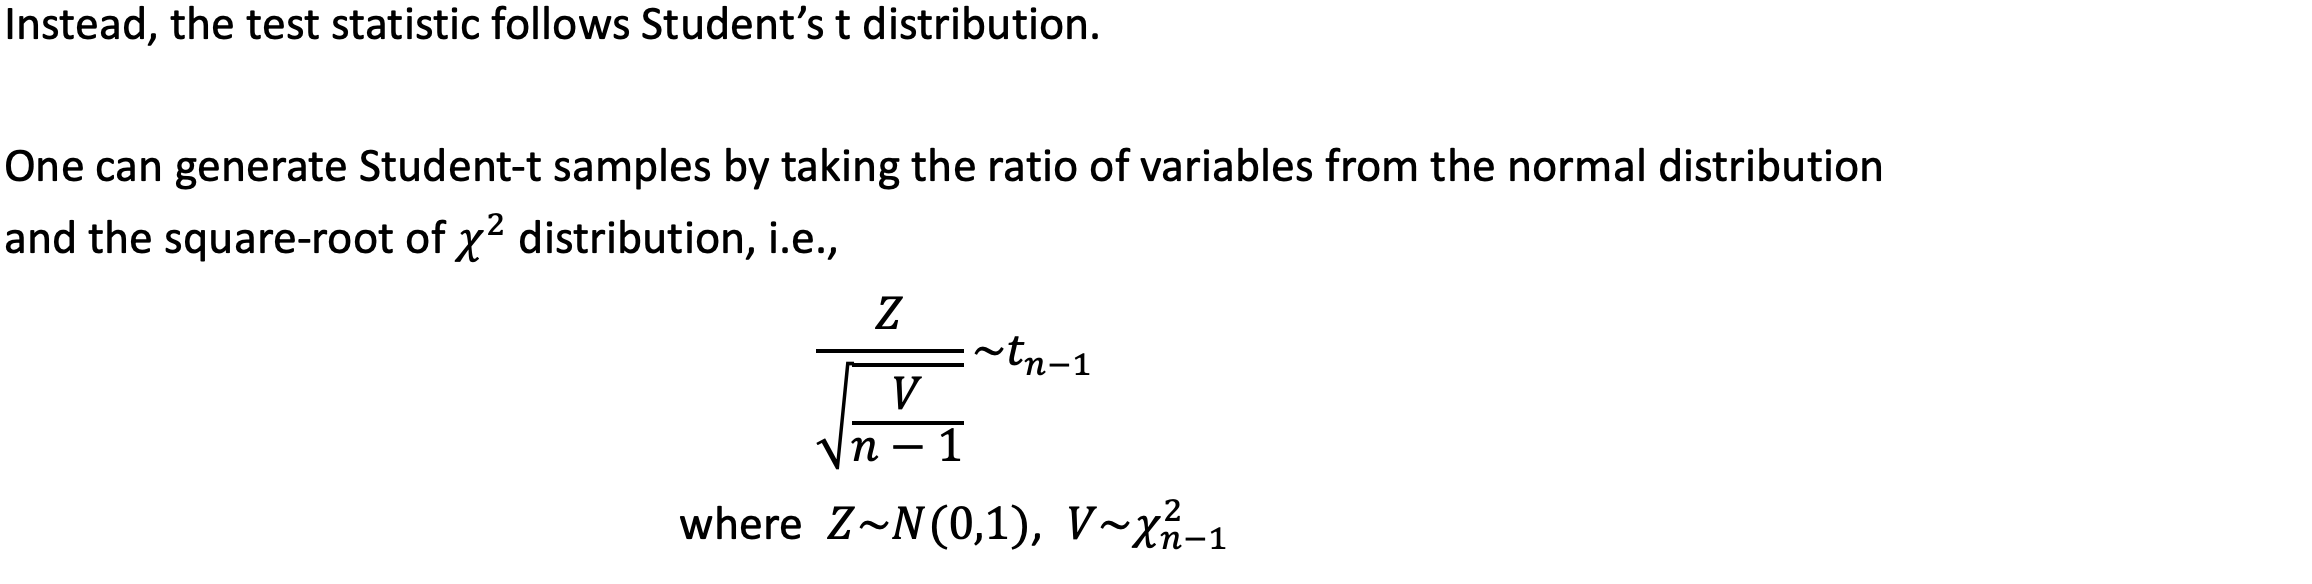
### [See derivations here](https://github.com/houzhj/Statistics/blob/main/math/02_wald_t_derivation_03.pdf)

Consider a simulation analysis
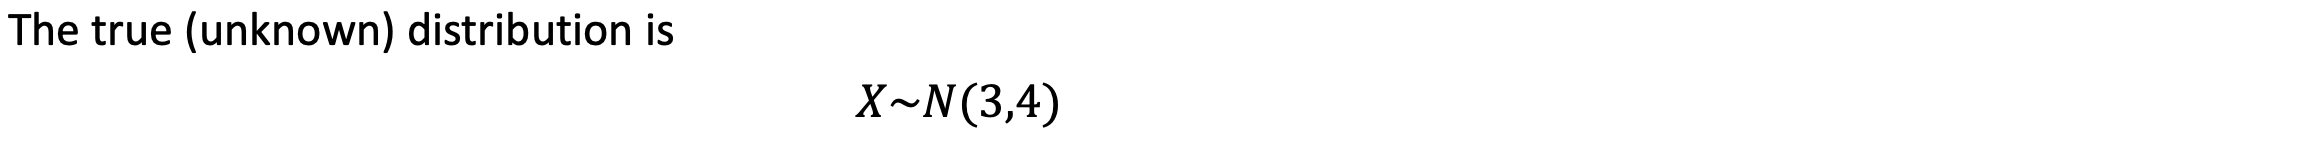

The following codes simulate 1000 experiments. 
- In each experiment, we draw a sample with pre-specified "sample size". 
- Then calculate the W statistic using each of these samples, and finaly obtain the density histogram of the W values.
- Note that there are two types of hypothesis tests: one-sided (H0: theta>=h0, or theta<=h0) and two-sided (H0: theta=h0)

In [17]:
##### ts(Test Statistics)
def ts_ttest_one_side(sample_size,mu0,population):
    ts = [np.nan]*n_experiment
    for i in range(n_experiment):
        sample      = np.random.choice(population,sample_size,replace=False)
        sample_mean = np.mean(sample)
        s2          = np.var(sample,ddof=1)
        ts[i]       = np.sqrt(sample_size)*(sample_mean-mu0)/np.sqrt(s2)
    return ts
       
        
def ts_ttest_two_side(sample_size,mu0,population):
    ts = [np.nan]*n_experiment
    for i in range(n_experiment):
        sample      = np.random.choice(population,sample_size,replace=False)
        sample_mean = np.mean(sample)
        s2          = np.var(sample,ddof=1)
        ts[i]       = abs(np.sqrt(sample_size)*(sample_mean-mu0)/np.sqrt(s2))
    return ts

### Example A - Wald test vs T test, Type 1 Error
- Consider the two-sided test with level = 5%
- H0: mu = 3. Since the null hypothesis in this case is true H0: mu =3, the rejection rate is actually Type 1 Error Rate.
- Calculate the Rejection Rates of two tests: Wald test, and Student's t test. The test statistic is the same, but when choosing the critical value, Wald Test assumes N(0,1), while T Test assumes t(n-1).
- Consider the following sample size: 3,5,10,20,50,100

In [18]:
alpha            = 0.05
sample_size_list = [3,5,10,20,50,100]

In [19]:
mu0    = 3
result = pd.DataFrame(columns=['sample_size','wald_rejection_rate','t_rejection_rate'])
for s in range(len(sample_size_list)):
    sample_size_now = sample_size_list[s]
    ts = ts_ttest_two_side(sample_size_now,mu0,population)
    critical_value_w = norm.ppf(1-alpha/2)
    critical_value_t = t.ppf(1-alpha/2, df=sample_size_now-1)
    w_reject = [int(ts[i]>critical_value_w) for i in range(len(ts))]
    t_reject = [int(ts[i]>critical_value_t) for i in range(len(ts))]
    result.loc[s,'sample_size']         = sample_size_now
    result.loc[s,'wald_rejection_rate'] = round(np.mean(w_reject),3)
    result.loc[s,'t_rejection_rate']    = round(np.mean(t_reject),3)  
    result['Wald_Type_1_Error'] = result['wald_rejection_rate']
    result['T_Type_1_Error']    = result['t_rejection_rate']
result

sample_size wald_rejection_rate t_rejection_rate Wald_Type_1_Error  \
0           3               0.195            0.056             0.195   
1           5               0.118            0.048             0.118   
2          10               0.081            0.049             0.081   
3          20               0.063            0.051             0.063   
4          50                0.05            0.046              0.05   
5         100               0.058            0.056             0.058   

  T_Type_1_Error  
0          0.056  
1          0.048  
2          0.049  
3          0.051  
4          0.046  
5          0.056

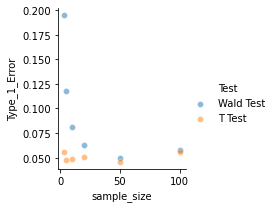

In [20]:
r1           = result[['sample_size','Wald_Type_1_Error']].copy()
r1.columns   = ['sample_size','Type_1_Error']
r1['Test']   = 'Wald Test'
r2           = result[['sample_size','T_Type_1_Error']].copy()
r2.columns   = ['sample_size','Type_1_Error']
r2['Test']   = 'T Test'
result_plot  = pd.concat([r1, r2], ignore_index=True)
g            = sns.FacetGrid(result_plot,hue='Test')
g.map(sns.scatterplot,'sample_size','Type_1_Error',alpha=0.5)
g.add_legend()
plt.show()

- When n is small (for example <10), the Type 1 Error Rate for the T Test is much smaller than the Wald tests. **But this does not mean we can use T test safely, because as shown below, the power of the T test is low when the sample size is small.**
- When n is large enough (e.g., >50), the performance of the Wald test and the T test are close. 
- In general the Wald test leads to smaller p-values than the T-test (i.e., higher rejection rate)

### Example B - Wald test vs T test, Type 2 Error
- Consider another test, with H0: mu = 4. This null hypothesis is not true, so the Type 2 Error Rate is 1-Rejection Rate. 
- Again, consider the following sample size: 3,5,10,20,50,100

In [21]:
mu0 = 4
result = pd.DataFrame(columns=['sample_size','wald_rejection_rate','t_rejection_rate'])
for s in range(len(sample_size_list)):
    sample_size_now = sample_size_list[s]
    ts = ts_ttest_two_side(sample_size_now,mu0,population)
    critical_value_w = norm.ppf(1-alpha/2)
    critical_value_t = t.ppf(1-alpha/2, df=sample_size_now-1)
    w_reject = [int(ts[i]>critical_value_w) for i in range(len(ts))]
    t_reject = [int(ts[i]>critical_value_t) for i in range(len(ts))]
    result.loc[s,'sample_size']         = sample_size_now
    result.loc[s,'wald_rejection_rate'] = round(np.mean(w_reject),3)
    result.loc[s,'t_rejection_rate']    = round(np.mean(t_reject),3)
result['Wald_Type_2_Error'] = 1-result['wald_rejection_rate']
result['T_Type_2_Error']    = 1-result['t_rejection_rate']
result

sample_size wald_rejection_rate t_rejection_rate Wald_Type_2_Error  \
0           3               0.286            0.095             0.714   
1           5               0.278            0.134             0.722   
2          10               0.415            0.312             0.585   
3          20               0.625             0.58             0.375   
4          50               0.946             0.94             0.054   
5         100               0.999            0.999             0.001   

  T_Type_2_Error  
0          0.905  
1          0.866  
2          0.688  
3           0.42  
4           0.06  
5          0.001

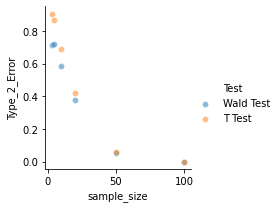

In [22]:
r1           = result[['sample_size','Wald_Type_2_Error']].copy()
r1.columns   = ['sample_size','Type_2_Error']
r1['Test']   = 'Wald Test'
r2           = result[['sample_size','T_Type_2_Error']].copy()
r2.columns   = ['sample_size','Type_2_Error']
r2['Test']   = 'T Test'
result_plot  = pd.concat([r1, r2], ignore_index=True)
g            = sns.FacetGrid(result_plot,hue='Test')
g.map(sns.scatterplot,'sample_size','Type_2_Error',alpha=0.5)
g.add_legend()
plt.show()

- As can be seen, increasing the sample size improve the power of the tests, like what happened in the Bernoulli Examples. 
- Again, like what happend when the null hypothesis is true: (1) When n is large enough (e.g., >50), the Wald Test and the T Test are close. (2) In general the Wald test leads to smaller p-values than the T-test (i.e., higher rejection rate)

### Example C - Wald test vs T test, impact of sample size and the true variance (unknown)
- If we consider a null hypothesis using a value more closer to 3, a larger sample size will be needed to get a test with high power.
- Consider the test - H0: p=3.1
- We use different values of true variance (unknown)

In [23]:
def type_2_error_plot(mu_true,sigma2_true,mu0):
    population       = np.random.normal(mu_true,np.sqrt(sigma2_true),100000)
    alpha            = 0.05
    sample_size_list = [100,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]
    result = pd.DataFrame(columns=['sample_size','wald_rejection_rate','t_rejection_rate'])
    for s in range(len(sample_size_list)):
        sample_size_now = sample_size_list[s]
        ts = ts_ttest_two_side(sample_size_now,mu0,population)
        critical_value_w = norm.ppf(1-alpha/2)
        critical_value_t = t.ppf(1-alpha/2, df=sample_size_now-1)
        w_reject = [int(ts[i]>critical_value_w) for i in range(len(ts))]
        t_reject = [int(ts[i]>critical_value_t) for i in range(len(ts))]
        result.loc[s,'sample_size']         = sample_size_now
        result.loc[s,'wald_rejection_rate'] = round(np.mean(w_reject),3)
        result.loc[s,'t_rejection_rate']    = round(np.mean(t_reject),3)
    result['Wald_Type_2_Error'] = 1-result['wald_rejection_rate']
    result['T_Type_2_Error']    = 1-result['t_rejection_rate']

    r1           = result[['sample_size','Wald_Type_2_Error']].copy()
    r1.columns   = ['sample_size','Type_2_Error']
    r1['Test']   = 'Wald Test'
    r2           = result[['sample_size','T_Type_2_Error']].copy()
    r2.columns   = ['sample_size','Type_2_Error']
    r2['Test']   = 'T Test'
    result_plot  = pd.concat([r1, r2], ignore_index=True)
    g            = sns.FacetGrid(result_plot,hue='Test')
    g.map(sns.scatterplot,'sample_size','Type_2_Error',alpha=0.5)
    g.add_legend()
    g.fig.suptitle('True Mean:'+str(mu_true)+', True Variance: '+str(sigma2_true)+', H0:mu='+str(mu0))
    plt.show()
    result['sigma2_true'] = sigma2_true
    return(result)


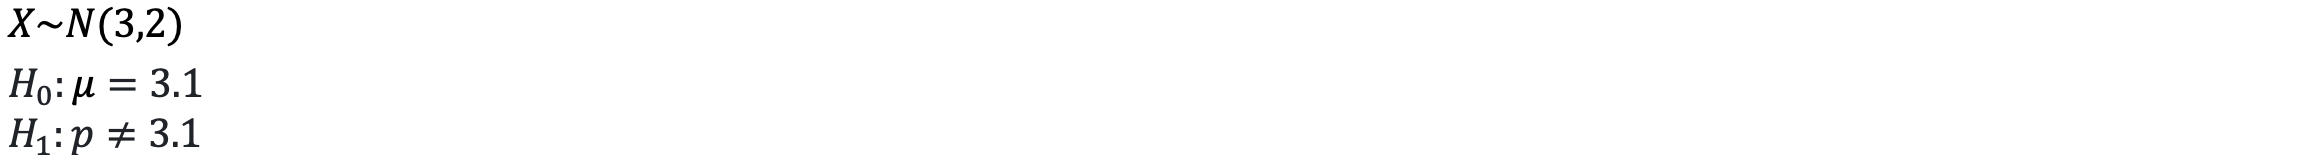
As shown above, the Type 2 Error rate is higher than 10% until the sample size increases to 2000.

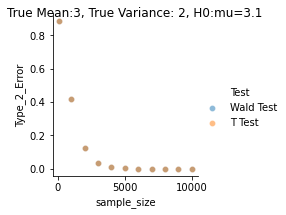

sample_size wald_rejection_rate t_rejection_rate Wald_Type_2_Error  \
0          100               0.114            0.112             0.886   
1         1000                0.58             0.58              0.42   
2         2000               0.876            0.875             0.124   
3         3000               0.964            0.964             0.036   
4         4000               0.988            0.988             0.012   
5         5000               0.998            0.998             0.002   
6         6000                 1.0              1.0               0.0   
7         7000                 1.0              1.0               0.0   
8         8000                 1.0              1.0               0.0   
9         9000                 1.0              1.0               0.0   
10       10000                 1.0              1.0               0.0   

   T_Type_2_Error  sigma2_true  
0           0.888            2  
1            0.42            2  
2           0.125            2  
3           0.036            2  
4           0.012            2  
5           0.002            2  
6             0.0            2  
7             0.0            2  
8             0.0            2  
9             0.0            2  
10            0.0            2

In [24]:
result_2 = type_2_error_plot(mu_true=3,sigma2_true=2,mu0=3.1)
result_2

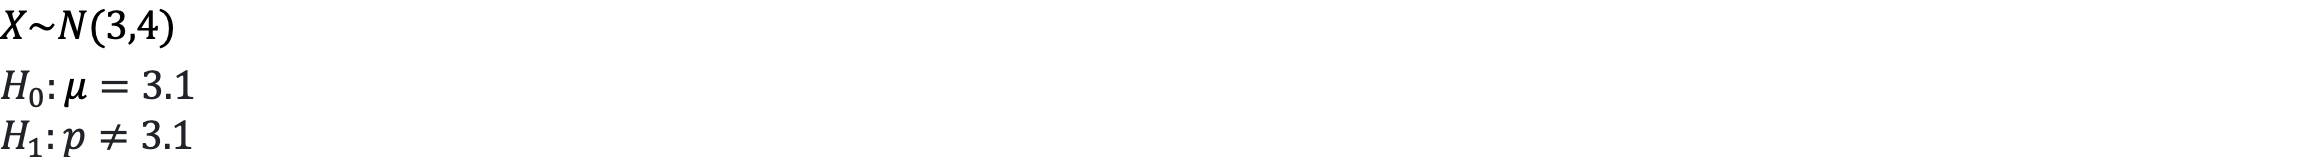

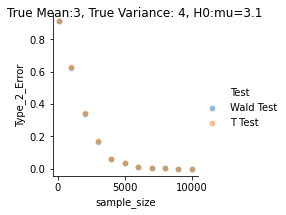

sample_size wald_rejection_rate t_rejection_rate Wald_Type_2_Error  \
0          100               0.086            0.084             0.914   
1         1000               0.374            0.373             0.626   
2         2000                0.66            0.658              0.34   
3         3000               0.833            0.832             0.167   
4         4000               0.938            0.938             0.062   
5         5000               0.966            0.966             0.034   
6         6000               0.988            0.988             0.012   
7         7000               0.994            0.994             0.006   
8         8000               0.998            0.998             0.002   
9         9000                 1.0              1.0               0.0   
10       10000                 1.0              1.0               0.0   

   T_Type_2_Error  sigma2_true  
0           0.916            4  
1           0.627            4  
2           0.342            4  
3           0.168            4  
4           0.062            4  
5           0.034            4  
6           0.012            4  
7           0.006            4  
8           0.002            4  
9             0.0            4  
10            0.0            4

In [25]:
result_4 = type_2_error_plot(mu_true=3,sigma2_true=4,mu0=3.1)
result_4

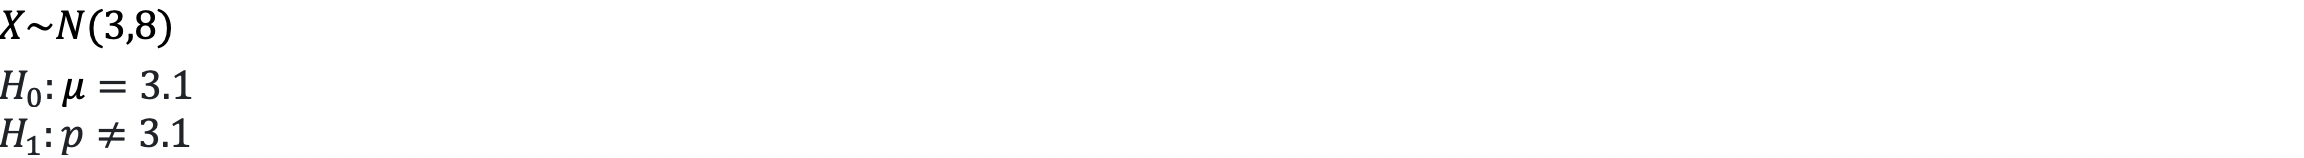

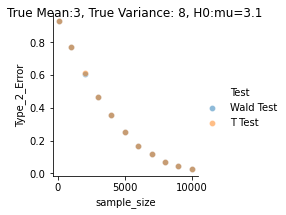

sample_size wald_rejection_rate t_rejection_rate Wald_Type_2_Error  \
0          100               0.071            0.068             0.929   
1         1000                0.23             0.23              0.77   
2         2000                0.39            0.388              0.61   
3         3000               0.532            0.532             0.468   
4         4000               0.643            0.643             0.357   
5         5000               0.747            0.747             0.253   
6         6000               0.832            0.831             0.168   
7         7000               0.884            0.884             0.116   
8         8000               0.933            0.933             0.067   
9         9000               0.953            0.953             0.047   
10       10000                0.97             0.97              0.03   

   T_Type_2_Error  sigma2_true  
0           0.932            8  
1            0.77            8  
2           0.612            8  
3           0.468            8  
4           0.357            8  
5           0.253            8  
6           0.169            8  
7           0.116            8  
8           0.067            8  
9           0.047            8  
10           0.03            8

In [26]:
result_8 = type_2_error_plot(mu_true=3,sigma2_true=8,mu0=3.1)
result_8

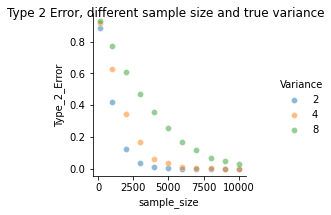

In [27]:
r2           = result_2[['sample_size','T_Type_2_Error','sigma2_true']].copy()
r2.columns   = ['sample_size','Type_2_Error','Variance']
r4           = result_4[['sample_size','T_Type_2_Error','sigma2_true']].copy()
r4.columns   = ['sample_size','Type_2_Error','Variance']
r8           = result_8[['sample_size','T_Type_2_Error','sigma2_true']].copy()
r8.columns   = ['sample_size','Type_2_Error','Variance']
result_plot  = pd.concat([r2,r4,r8], ignore_index=True)

g            = sns.FacetGrid(result_plot,hue='Variance')
g.map(sns.scatterplot,'sample_size','Type_2_Error',alpha=0.5)
g.add_legend()
g.fig.suptitle('Type 2 Error, different sample size and true variance')
plt.show()